<a href="https://colab.research.google.com/github/aaronkr-classroom/11-keras-nn-pm-leewootak/blob/main/11_training_deep_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**11Ïû• ‚Äì Ïã¨Ï∏µ Ïã†Í≤ΩÎßù ÌõàÎ†®ÌïòÍ∏∞**

_Ïù¥ ÎÖ∏Ìä∏Î∂ÅÏóêÎäî 11Ïû•Ïùò Î™®Îì† ÏÉòÌîå ÏΩîÎìúÏôÄ Ïó∞Ïäµ Î¨∏Ï†úÏóê ÎåÄÌïú ÏÜîÎ£®ÏÖòÏù¥ Ìè¨Ìï®ÎêòÏñ¥ ÏûàÏäµÎãàÎã§._

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/rickiepark/handson-ml3/blob/main/11_training_deep_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# ÏÑ§Ï†ï

Ïù¥ ÌîÑÎ°úÏ†ùÌä∏ÏóêÎäî ÌååÏù¥Ïç¨ 3.7 Ïù¥ÏÉÅÏù¥ ÌïÑÏöîÌï©ÎãàÎã§:

In [33]:
import sys

assert sys.version_info >= (3, 7)

Í∑∏Î¶¨Í≥† ÌÖêÏÑúÌîåÎ°ú ‚â• 2.8:

In [34]:
from packaging import version
import tensorflow as tf

assert version.parse(tf.__version__) >= version.parse("2.8.0")

Ïù¥Ï†Ñ Ïû•ÏóêÏÑúÏôÄ ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú Í∏∞Î≥∏ Í∏ÄÍº¥ ÌÅ¨Í∏∞Î•º Ï†ïÏùòÌïòÏó¨ Í∑∏Î¶ºÏùÑ Îçî ÏòàÏÅòÍ≤å ÎßåÎì§Ïñ¥ Î≥¥Í≤†ÏäµÎãàÎã§:

In [35]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

import sys
# ÏΩîÎû©Ïùò Í≤ΩÏö∞ ÎÇòÎàî Ìè∞Ìä∏Î•º ÏÑ§ÏπòÌï©ÎãàÎã§.
if 'google.colab' in sys.modules:
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

# ÎÇòÎàî Ìè∞Ìä∏Î•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.
import matplotlib

matplotlib.rc('font', family='NanumBarunGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

Í∑∏Î¶¨Í≥† `images/deep` Ìè¥ÎçîÎ•º ÎßåÎì§Í≥†(ÏïÑÏßÅ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÎäî Í≤ΩÏö∞), Ïù¥ ÎÖ∏Ìä∏Î∂ÅÏùÑ ÌÜµÌï¥ Ï±ÖÏóê ÏÇ¨Ïö©Ìï† Í∑∏Î¶ºÏùÑ Í≥†Ìï¥ÏÉÅÎèÑÎ°ú Ï†ÄÏû•ÌïòÎäî Îç∞ ÏÇ¨Ïö©ÎêòÎäî `save_fig()` Ìï®ÏàòÎ•º Ï†ïÏùòÌïòÍ≤†ÏäµÎãàÎã§:

In [36]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "deep"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Í∑∏Î†àÏù¥ÎîîÏñ∏Ìä∏ ÏÜåÏã§Í≥º Ìè≠Ï£º Î¨∏Ï†ú

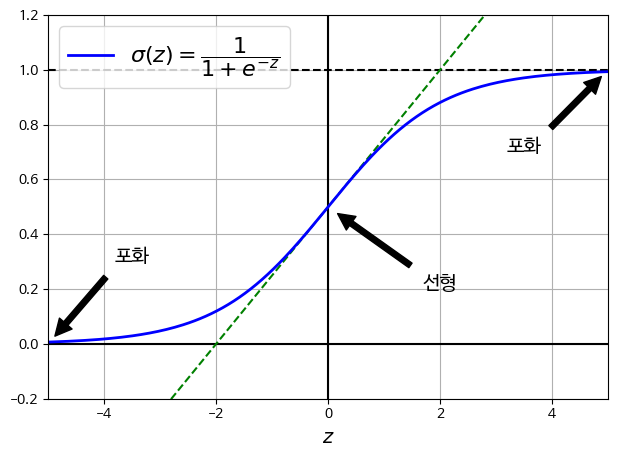

In [37]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Ïù¥ ÏÖÄÏùÄ Í∑∏Î¶º 11-1ÏùÑ ÏÉùÏÑ±ÌïòÍ≥† Ï†ÄÏû•Ìï©ÎãàÎã§.

import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, sigmoid(z), "b-", linewidth=2,
         label=r"$\sigma(z) = \dfrac{1}{1+e^{-z}}$")
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Ìè¨Ìôî', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props,
             fontsize=14, ha="center")
plt.annotate('Ìè¨Ìôî', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props,
             fontsize=14, ha="center")
plt.annotate('ÏÑ†Ìòï', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props,
             fontsize=14, ha="center")
plt.grid(True)
plt.axis([-5, 5, -0.2, 1.2])
plt.xlabel("$z$")
plt.legend(loc="upper left", fontsize=16)

save_fig("sigmoid_saturation_plot")
plt.show()

## Xavier Ï¥àÍ∏∞ÌôîÏôÄ He Ï¥àÍ∏∞Ìôî

In [38]:
dense = tf.keras.layers.Dense(50, activation="relu",
                              kernel_initializer="he_normal")

In [39]:
he_avg_init = tf.keras.initializers.VarianceScaling(scale=2., mode="fan_avg",
                                                    distribution="uniform")
dense = tf.keras.layers.Dense(50, activation="sigmoid",
                              kernel_initializer=he_avg_init)

## ÏàòÎ†¥ÌïòÏßÄ ÏïäÎäî ÌôúÏÑ±Ìôî Ìï®Ïàò

### LeakyReLU

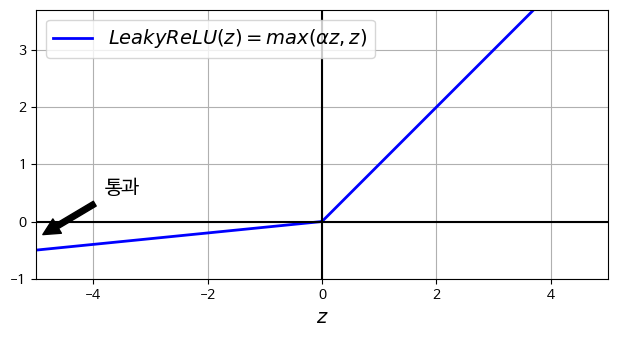

In [40]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Ïù¥ ÏÖÄÏùÄ Í∑∏Î¶º 11-2Î•º ÏÉùÏÑ±ÌïòÍ≥† Ï†ÄÏû•Ìï©ÎãàÎã§.

def leaky_relu(z, alpha):
    return np.maximum(alpha * z, z)

z = np.linspace(-5, 5, 200)
plt.plot(z, leaky_relu(z, 0.1), "b-", linewidth=2, label=r"$LeakyReLU(z) = max(\alpha z, z)$")
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-1, 3.7], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('ÌÜµÍ≥º', xytext=(-3.5, 0.5), xy=(-5, -0.3), arrowprops=props,
             fontsize=14, ha="center")
plt.xlabel("$z$")
plt.axis([-5, 5, -1, 3.7])
plt.gca().set_aspect("equal")
plt.legend()

save_fig("leaky_relu_plot")
plt.show()

In [41]:
leaky_relu = tf.keras.layers.LeakyReLU(alpha=0.2)  # Í∏∞Î≥∏Í∞í alpha=0.3
dense = tf.keras.layers.Dense(50, activation=leaky_relu,
                              kernel_initializer="he_normal")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [42]:
model = tf.keras.models.Sequential([
    # [...]  # Îã§Î•∏ Ï∏µ
    tf.keras.layers.Dense(50, kernel_initializer="he_normal"),  # ÌôúÏÑ±Ìôî Ìï®Ïàò ÏóÜÏùå
    tf.keras.layers.LeakyReLU(alpha=0.2),  # Î≥ÑÎèÑÏùò Ï∏µÏúºÎ°ú ÌôúÏÑ±Ìôî Ìï®Ïàò Ï∂îÍ∞Ä
    # [...]  # Îã§Î•∏ Ï∏µ
])

### ELU

ÌÖêÏÑúÌîåÎ°úÏóêÏÑú ELUÎ•º Íµ¨ÌòÑÌïòÎäî Í≤ÉÏùÄ Í∞ÑÎã®Ìï©ÎãàÎã§. Ï∏µÏùÑ ÎßåÎì§ Îïå ÌôúÏÑ±Ìôî Ìï®ÏàòÎ•º ÏßÄÏ†ïÌïòÍ≥† He Ï¥àÍ∏∞ÌôîÎ•º ÏÇ¨Ïö©ÌïòÍ∏∞Îßå ÌïòÎ©¥ Îê©ÎãàÎã§:

In [43]:
dense = tf.keras.layers.Dense(50, activation="elu",
                              kernel_initializer="he_normal")

### SELU

Í∏∞Î≥∏Ï†ÅÏúºÎ°ú SELU ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞(`scale` Î∞è `alpha`)Îäî Í∞Å Îâ¥Îü∞Ïùò ÌèâÍ∑† Ï∂úÎ†•Ïù¥ 0, ÌëúÏ§ÄÌé∏Ï∞®Í∞Ä 1Ïóê Í∞ÄÍπùÍ≤å Ïú†ÏßÄÎêòÎèÑÎ°ù ÌäúÎãùÎê©ÎãàÎã§(Ï±ÖÏóêÏÑú ÏÑ§Î™ÖÌïú ÎåÄÎ°ú ÏûÖÎ†•ÎèÑ ÌèâÍ∑† 0Í≥º ÌëúÏ§ÄÌé∏Ï∞® 1Î°ú ÌëúÏ§ÄÌôîÎêòÍ≥† Îã§Î•∏ Ï†úÏïΩ Ï°∞Í±¥Ïù¥ Ï§ÄÏàòÎêúÎã§Í≥† Í∞ÄÏ†ïÌï©ÎãàÎã§). Ïù¥ ÌôúÏÑ±Ìôî Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÎ©¥ 1,000Í∞ú Ï∏µÏùÑ Í∞ÄÏßÑ Ïã¨Ï∏µ Ïã†Í≤ΩÎßùÏóêÏÑúÎèÑ Î™®Îì† Ï∏µÏóêÏÑú ÎåÄÎûµ ÌèâÍ∑† 0Í≥º ÌëúÏ§ÄÌé∏Ï∞® 1ÏùÑ Ïú†ÏßÄÌïòÏó¨ Í∏∞Ïö∏Í∏∞Í∞Ä Ìè≠Ï£º/ÏÜåÎ©∏ÌïòÎäî Î¨∏Ï†úÎ•º ÌîºÌï† Ïàò ÏûàÏäµÎãàÎã§:

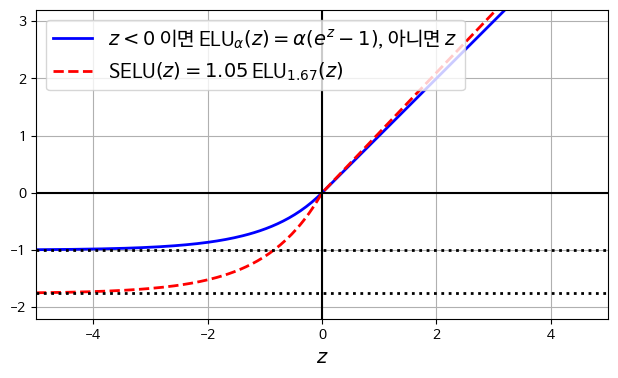

In [44]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Ïù¥ ÏÖÄÏùÄ Í∑∏Î¶º 11-3ÏùÑ ÏÉùÏÑ±ÌïòÍ≥† Ï†ÄÏû•Ìï©ÎãàÎã§.

from scipy.special import erfc

# ÌèâÍ∑† 0, ÌëúÏ§Ä Ìé∏Ï∞® 1Î°ú ÏûêÏ≤¥ Ï†ïÍ∑úÌôîÌïòÍ∏∞ ÏúÑÌïú alpha Î∞è sacle
# (ÎÖºÎ¨∏Ïóê ÏûàÎäî Ïãù 14 Ï∞∏Ï°∞):
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1 / np.sqrt(2)) * np.exp(1 / 2) - 1)
scale_0_1 = (
    (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e))
    * np.sqrt(2 * np.pi)
    * (
        2 * erfc(np.sqrt(2)) * np.e ** 2
        + np.pi * erfc(1 / np.sqrt(2)) ** 2 * np.e
        - 2 * (2 + np.pi) * erfc(1 / np.sqrt(2)) * np.sqrt(np.e)
        + np.pi
        + 2
    ) ** (-1 / 2)
)

def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

z = np.linspace(-5, 5, 200)
plt.plot(z, elu(z), "b-", linewidth=2, label=r"$z < 0$ Ïù¥Î©¥ ELU$_\alpha(z) = \alpha (e^z - 1)$, ÏïÑÎãàÎ©¥ $z$")
plt.plot(z, selu(z), "r--", linewidth=2, label=r"SELU$(z) = 1.05 \, $ELU$_{1.67}(z)$")
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k:', linewidth=2)
plt.plot([-5, 5], [-1.758, -1.758], 'k:', linewidth=2)
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.axis([-5, 5, -2.2, 3.2])
plt.xlabel("$z$")
plt.gca().set_aspect("equal")
plt.legend()

save_fig("elu_selu_plot")
plt.show()

SELU ÏÇ¨Ïö©Î≤ïÏùÄ Í∞ÑÎã®Ìï©ÎãàÎã§:

In [45]:
dense = tf.keras.layers.Dense(50, activation="selu",
                              kernel_initializer="lecun_normal")

**Ï∂îÍ∞Ä ÏûêÎ£å - SELUÎ•º ÏÇ¨Ïö©Ìïú ÏûêÍ∏∞ Ï†ïÍ∑úÌôîÎêú ÎÑ§Ìä∏ÏõåÌÅ¨Ïùò ÏòàÏãú**

SELU ÌôúÏÑ±Ìôî Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÏó¨ 100Í∞úÏùò ÏùÄÎãâÏ∏µÏù¥ ÏûàÎäî Ìå®ÏÖò MNISTÏö© Ïã†Í≤ΩÎßùÏùÑ ÎßåÎì§Ïñ¥ Î≥¥Í≤†ÏäµÎãàÎã§:

In [46]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
for layer in range(100):
    model.add(tf.keras.layers.Dense(100, activation="selu",
                                    kernel_initializer="lecun_normal"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [47]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=["accuracy"])

Ïù¥Ï†ú ÌõàÎ†®Ìï¥ Î¥ÖÏãúÎã§. ÏûÖÎ†•Í∞íÏùÑ ÌèâÍ∑† 0, ÌëúÏ§ÄÌé∏Ï∞® 1Î°ú Ïä§ÏºÄÏùºÎßÅÌïòÎäî Í≤ÉÏùÑ ÏûäÏßÄ ÎßàÏÑ∏Ïöî:

In [48]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]
X_train, X_valid, X_test = X_train / 255, X_valid / 255, X_test / 255

In [49]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [50]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [51]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 22s 9ms/step - accuracy: 0.4352 - loss: 1.4868 - val_accuracy: 0.7528 - val_loss: 0.7309
Epoch 2/5
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 14s 6ms/step - accuracy: 0.7499 - loss: 0.7038 - val_accuracy: 0.7808 - val_loss: 0.5946
Epoch 3/5
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 11s 7ms/step - accuracy: 0.7883 - loss: 0.5927 - val_accuracy: 0.7996 - val_loss: 0.5577
Epoch 4/5
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 11s 7ms/step - accuracy: 0.8050 - loss: 0.5648 - val_accuracy: 0.8150 - val_loss: 0.5256
Epoch 5/5
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 11s 7ms/step - accuracy: 0.8256 - loss: 0.5097 - val_accuracy: 0.8252 - val_loss: 0.4925


Ïã†Í≤ΩÎßùÏù¥ Îß§Ïö∞ ÍπäÏùÄÎç∞ÎèÑ ÌïôÏäµÏóê ÏÑ±Í≥µÌñàÏäµÎãàÎã§. Ïù¥Ï†ú ReLU ÌôúÏÑ±Ìôî Ìï®ÏàòÎ•º ÎåÄÏã† ÏÇ¨Ïö©ÌïòÎ©¥ Ïñ¥Îñ§ ÏùºÏù¥ Î∞úÏÉùÌïòÎäîÏßÄ ÏÇ¥Ìé¥Î≥¥Í≤†ÏäµÎãàÎã§:

In [52]:
tf.random.set_seed(42)

In [53]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
for layer in range(100):
    model.add(tf.keras.layers.Dense(100, activation="relu",
                                    kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [54]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=["accuracy"])

In [55]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 22s 9ms/step - accuracy: 0.1795 - loss: 2.0813 - val_accuracy: 0.2418 - val_loss: 1.7998
Epoch 2/5
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13s 7ms/step - accuracy: 0.4275 - loss: 1.3475 - val_accuracy: 0.6546 - val_loss: 0.8925
Epoch 3/5
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 11s 7ms/step - accuracy: 0.5704 - loss: 1.0593 - val_accuracy: 0.6600 - val_loss: 0.8665
Epoch 4/5
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12s 7ms/step - accuracy: 0.6858 - loss: 0.7805 - val_accuracy: 0.7058 - val_loss: 0.7341
Epoch 5/5
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 20s 7ms/step - accuracy: 0.6007 - loss: 1.0328 - val_accuracy: 0.6952 - val_loss: 0.7549


Ï¢ãÏßÄ ÏïäÎÑ§Ïöî. Í∑∏Î†àÏù¥ÎîîÏñ∏Ìä∏ ÏÜåÎ©∏/Ìè≠Ï£º Î¨∏Ï†úÎ°ú Ïù∏Ìï¥ Ïñ¥Î†§ÏõÄÏùÑ Í≤™ÏäµÎãàÎã§.

### GELU, Swish, Mish

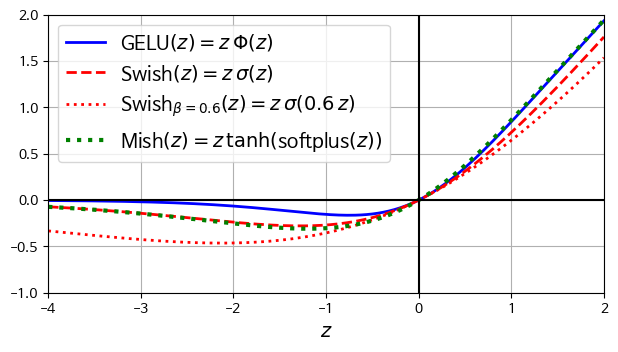

In [56]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Ïù¥ ÏÖÄÏùÄ Í∑∏Î¶º 11-4Î•º ÏÉùÏÑ±ÌïòÍ≥† Ï†ÄÏû•Ìï©ÎãàÎã§.

def swish(z, beta=1):
    return z * sigmoid(beta * z)

def approx_gelu(z):
    return swish(z, beta=1.702)

def softplus(z):
    return np.log(1 + np.exp(z))

def mish(z):
    return z * np.tanh(softplus(z))

z = np.linspace(-4, 2, 200)

beta = 0.6
plt.plot(z, approx_gelu(z), "b-", linewidth=2,
         label=r"GELU$(z) = z\,\Phi(z)$")
plt.plot(z, swish(z), "r--", linewidth=2,
         label=r"Swish$(z) = z\,\sigma(z)$")
plt.plot(z, swish(z, beta), "r:", linewidth=2,
         label=fr"Swish$_{{\beta={beta}}}(z)=z\,\sigma({beta}\,z)$")
plt.plot(z, mish(z), "g:", linewidth=3,
         label=fr"Mish$(z) = z\,\tanh($softplus$(z))$")
plt.plot([-4, 2], [0, 0], 'k-')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.axis([-4, 2, -1, 2])
plt.gca().set_aspect("equal")
plt.xlabel("$z$")
plt.legend(loc="upper left")

save_fig("gelu_swish_mish_plot")
plt.show()

# Î∞∞Ïπò Ï†ïÍ∑úÌôî

In [57]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Ïù¥Î¶Ñ Ïπ¥Ïö¥ÌÑ∞Î•º ÏßÄÏö∞Í≥† ÎûúÎç§ ÏãúÎìúÎ•º ÏÑ§Ï†ïÌï©ÎãàÎã§.
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [58]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [59]:
model.summary()

Model: "sequential"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                         ‚îÉ Output Shape                ‚îÉ         Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ flatten (Flatten)                    ‚îÇ (None, 784)                 ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization                  ‚îÇ (None, 784)                 ‚îÇ           3,136 ‚îÇ
‚îÇ (BatchNormalization)                 ‚îÇ                             ‚îÇ                 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense (Dense)                        ‚îÇ (None, 300)                 ‚îÇ         235,500 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_1                ‚îÇ (None, 300)                 ‚îÇ           1,200 ‚îÇ
‚îÇ (BatchNormalization)                 ‚îÇ                             ‚îÇ                 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_1 (Dense)                      ‚îÇ (None, 100)                 ‚îÇ          30,100 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_2                ‚îÇ (None, 100)                 ‚îÇ             400 ‚îÇ
‚îÇ (BatchNormalization)                 ‚îÇ                             ‚îÇ                 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_2 (Dense)                      ‚îÇ (None, 10)                  ‚îÇ           1,010 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 271,346 (1.04 MB)

 Trainable params: 268,978 (1.03 MB)

 Non-trainable params: 2,368 (9.25 KB)

In [60]:
[(var.name, var.trainable) for var in model.layers[1].variables]

[('gamma', True),
 ('beta', True),
 ('moving_mean', False),
 ('moving_variance', False)]

In [ ]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Î™®Îç∏Ïù¥ ÏûëÎèôÌïúÎã§Îäî Í≤ÉÏùÑ Î≥¥Ïó¨Ï£ºÍ∏∞Îßå ÌïòÎ©¥ Îê©ÎãàÎã§! üòä
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",
              metrics="accuracy")
model.fit(X_train, y_train, epochs=2, validation_data=(X_valid, y_valid))

ÎïåÎïåÎ°ú ÌôúÏÑ±Ìôî Ìï®Ïàò Ï†ÑÏóê BNÏùÑ Ï†ÅÏö©ÌïòÎäî Í≤ÉÏù¥ Îçî Ìö®Í≥ºÏ†ÅÏùº Ïàò ÏûàÏäµÎãàÎã§(Ïù¥ Ï£ºÏ†úÏóê ÎåÄÌïú ÎÖºÏüÅÏù¥ ÏûàÏäµÎãàÎã§). ÎòêÌïú, `BatchNormalization` ÏïûÏùò Ï∏µÏóêÎäî Ìé∏Ìñ• Ìï≠Ïù¥ ÌïÑÏöîÌïòÏßÄ ÏïäÏäµÎãàÎã§. Îî∞ÎùºÏÑú Ìé∏Ìñ•Ïù¥ ÏûàÏúºÎ©¥ ÌååÎùºÎØ∏ÌÑ∞Í∞Ä ÎÇ≠ÎπÑÎê† Ïàò ÏûàÏúºÎØÄÎ°ú Ï∏µÏùÑ ÏÉùÏÑ±Ìï† Îïå `use_bias=False`Î°ú ÏßÄÏ†ïÌï† Ïàò ÏûàÏäµÎãàÎã§:

In [62]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Ïù¥Î¶Ñ Ïπ¥Ïö¥ÌÑ∞Î•º ÏßÄÏö∞Í≥† Î¨¥ÏûëÏúÑ ÏãúÎìúÎ•º ÏÑ§Ï†ïÌï©ÎãàÎã§.
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [63]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, kernel_initializer="he_normal", use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(100, kernel_initializer="he_normal", use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [ ]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Î™®Îç∏Ïù¥ ÏûëÎèôÌïúÎã§Îäî Í≤ÉÏùÑ Î≥¥Ïó¨Ï£ºÍ∏∞Îßå ÌïòÎ©¥ Îê©ÎãàÎã§! üòä
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",
              metrics="accuracy")
model.fit(X_train, y_train, epochs=2, validation_data=(X_valid, y_valid))

## Í∑∏Î†àÏù¥ÎîîÏñ∏Ìä∏ ÌÅ¥Î¶¨Ìïë

Î™®Îì† `tf.keras.optimizers`Îäî `clipnorm` ÎòêÎäî `clipvalue` Îß§Í∞úÎ≥ÄÏàòÎ•º Î∞õÏäµÎãàÎã§:

In [65]:
optimizer = tf.keras.optimizers.SGD(clipvalue=1.0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer)

In [66]:
optimizer = tf.keras.optimizers.SGD(clipnorm=1.0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer)

## ÏÇ¨Ï†Ñ ÌõàÎ†®Îêú Ï∏µ Ïû¨ÏÇ¨Ïö©

### ÏºÄÎùºÏä§ Î™®Îç∏ Ïû¨ÏÇ¨Ïö©

Ìå®ÏÖò MNIST ÌõàÎ†® ÏßëÌï©ÏùÑ Îëê Í∞úÎ°ú ÎÇòÎà† Î≥¥Í≤†ÏäµÎãàÎã§:
* `X_train_A`: T-shirts/topsÏôÄ pulloversÎ•º Ï†úÏô∏Ìïú Î™®Îì† Ìï≠Î™©Ïùò Î™®Îì† Ïù¥ÎØ∏ÏßÄ (ÌÅ¥ÎûòÏä§ 0Í≥º 2).
* `X_train_B`: T-shirts/topsÏôÄ pullovers Ï§ëÏóêÏÑú Ï≤òÏùå 200Í∞úÏùò Ïù¥ÎØ∏ÏßÄÎ°úÎßå Íµ¨ÏÑ±Îêú Ìõ®Ïî¨ ÏûëÏùÄ ÌõàÎ†® ÏÑ∏Ìä∏.

Í≤ÄÏ¶ù ÏÑ∏Ìä∏ÏôÄ ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ÎèÑ Ïù¥Îü¨Ìïú Î∞©ÏãùÏúºÎ°ú Î∂ÑÌï†ÎêòÏßÄÎßå Ïù¥ÎØ∏ÏßÄ ÏàòÏóêÎäî Ï†úÌïúÏù¥ ÏóÜÏäµÎãàÎã§.

ÏßëÌï© A(8Í∞úÏùò ÌÅ¥ÎûòÏä§Í∞Ä ÏûàÎäî Î∂ÑÎ•ò ÏûëÏóÖ)Ïóê ÎåÄÌï¥ Î™®Îç∏ÏùÑ ÌõàÎ†®ÌïòÍ≥†, Ïù¥Î•º Îã§Ïãú ÏßëÌï© B(Ïù¥ÏßÑ Î∂ÑÎ•ò)Î•º Ï≤òÎ¶¨ÌïòÎäî Îç∞ ÏÇ¨Ïö©ÌïòÎ†§Í≥† Ìï©ÎãàÎã§. ÏßëÌï© AÏùò ÌÅ¥ÎûòÏä§(trousers, dresses, coats, sandals, shirts, sneakers, bags, and ankle boots)Îäî ÏßëÌï© BÏùò ÌÅ¥ÎûòÏä§(T-shirts/tops, pullovers)Í≥º Îã§ÏÜå Ïú†ÏÇ¨ÌïòÎØÄÎ°ú, ÏûëÏóÖ AÏóêÏÑú ÏûëÏóÖ BÎ°ú ÏïΩÍ∞ÑÏùò ÏßÄÏãùÏù¥ Ï†ÑÏù¥ÎêòÍ∏∞Î•º Ìù¨ÎßùÌï©ÎãàÎã§.

Í∑∏Îü¨ÎÇò `Dense` Ï∏µÏùÑ ÏÇ¨Ïö©ÌïòÍ∏∞ ÎïåÎ¨∏Ïóê Í∞ôÏùÄ ÏúÑÏπòÏóêÏÑú Î∞úÏÉùÌïòÎäî Ìå®ÌÑ¥Îßå Ïû¨ÏÇ¨Ïö©Ìï† Ïàò ÏûàÏäµÎãàÎã§(ÌïòÏßÄÎßå 14Ïû•ÏóêÏÑú ÏÇ¥Ìé¥Î≥º Ìï©ÏÑ±Í≥± Ï∏µÏùÄ ÌïôÏäµÎêú Ìå®ÌÑ¥ÏùÑ Ïù¥ÎØ∏ÏßÄÏùò Ïñ¥Îäê ÏúÑÏπòÏóêÏÑúÎÇò Í∞êÏßÄÌï† Ïàò ÏûàÏäµÎãàÎã§).

In [67]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Ìå®ÏÖò MNISTÎ•º ÏûëÏóÖ AÏôÄ BÎ°ú Î∂ÑÌï†Ìïú Îã§Ïùå Î™®Îç∏ AÎ•º ÌïôÏäµÌïòÍ≥† "my_model_A"Ïóê Ï†ÄÏû•Ìï©ÎãàÎã§.

pos_class_id = class_names.index("Pullover")
neg_class_id = class_names.index("T-shirt/top")

def split_dataset(X, y):
    y_for_B = (y == pos_class_id) | (y == neg_class_id)
    y_A = y[~y_for_B]
    y_B = (y[y_for_B] == pos_class_id).astype(np.float32)
    old_class_ids = list(set(range(10)) - set([neg_class_id, pos_class_id]))
    for old_class_id, new_class_id in zip(old_class_ids, range(8)):
        y_A[y_A == old_class_id] = new_class_id  # AÏóê ÎåÄÌïú ÌÅ¥ÎûòÏä§ ID Ïû¨Ï†ïÏùò
    return ((X[~y_for_B], y_A), (X[y_for_B], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

tf.random.set_seed(42)

model_A = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dense(8, activation="softmax")
])

model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
                metrics=["accuracy"])
history = model_A.fit(X_train_A, y_train_A, epochs=20,
                      validation_data=(X_valid_A, y_valid_A))
model_A.save("my_model_A")

Epoch 1/20
1376/1376 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 3ms/step - accuracy: 0.4700 - loss: 1.5190 - val_accuracy: 0.7897 - val_loss: 0.6867
Epoch 2/20
1376/1376 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 2ms/step - accuracy: 0.8030 - loss: 0.6317 - val_accuracy: 0.8358 - val_loss: 0.5034
Epoch 3/20
1376/1376 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8460 - loss: 0.4864 - val_accuracy: 0.8533 - val_loss: 0.4327
Epoch 4/20
1376/1376 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8642 - loss: 0.4225 - val_accuracy: 0.8624 - val_loss: 0.3930
Epoch 5/20
1376/1376 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8738 - loss: 0.3840 - val_accuracy: 0.8732 - val_loss: 0.3672
Epoch 6/20
1376/1376 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 2ms/step - accuracy: 0.8801 - loss: 0.3579 - val_accuracy: 0.8779

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=my_model_A.

In [68]:
# extra code ‚Äì train and evaluate model B, without reusing model A

tf.random.set_seed(42)
model_B = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_B.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
                metrics=["accuracy"])
history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))
model_B.evaluate(X_test_B, y_test_B)

Epoch 1/20
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 216ms/step - accuracy: 0.6305 - loss: 0.6552 - val_accuracy: 0.7240 - val_loss: 0.6320
Epoch 2/20
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 12ms/step - accuracy: 0.7282 - loss: 0.6373 - val_accuracy: 0.7715 - val_loss: 0.6175
Epoch 3/20
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 15ms/step - accuracy: 0.8277 - loss: 0.6210 - val_accuracy: 0.8170 - val_loss: 0.6039
Epoch 4/20
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 17ms/step - accuracy: 0.8638 - loss: 0.6058 - val_accuracy: 0.8506 - val_loss: 0.5915
Epoch 5/20
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 18ms/step - accuracy: 0.8893 - loss: 0.5917 - val_accuracy: 0.8744 - val_loss: 0.5797
Epoch 6/20
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 22ms/step - accuracy: 0.9058 - loss: 0.5784 - val_accuracy: 0.8872 - val_loss: 0.5686
Epoch 7/2

[0.4376693367958069, 0.925000011920929]

Î™®Îç∏ BÎäî ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ÏóêÏÑú 91.85%Ïùò Ï†ïÌôïÎèÑÏóê ÎèÑÎã¨ÌñàÏäµÎãàÎã§. Ïù¥Ï†ú ÏÇ¨Ï†Ñ ÌïôÏäµÎêú Î™®Îç∏ AÎ•º Ïû¨ÏÇ¨Ïö©Ìï¥ Î≥¥Í≤†ÏäµÎãàÎã§.

In [ ]:
model_A = tf.keras.models.load_model("my_model_A,keras")
model_B_on_A = tf.keras.Sequential(model_A.layers[:-1])
model_B_on_A.add(tf.keras.layers.Dense(1, activation="sigmoid"))

`model_B_on_A`ÏôÄ `model_A`Îäî Ï∏µÏùÑ Ïã§Ï†ú Í≥µÏú†ÌïòÎØÄÎ°ú ÌïòÎÇòÎ•º ÌõàÎ†®ÌïòÎ©¥ Îëê Î™®Îç∏Ïù¥ Î™®Îëê ÏóÖÎç∞Ïù¥Ìä∏Îê©ÎãàÎã§. Ïù¥Î•º Î∞©ÏßÄÌïòÎ†§Î©¥ `model_A`Ïùò *Î≥µÏ†úÌïòÏó¨* `model_B_on_A`Î•º ÎßåÎì§Ïñ¥Ïïº Ìï©ÎãàÎã§:

In [70]:
tf.random.set_seed(42)  # Ï∂îÍ∞Ä ÏΩîÎìú - Ïû¨ÌòÑÏÑ± Î≥¥Ïû•

In [71]:
model_A_clone = tf.keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [72]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Ïù¥Ï†Ñ ÏÖÄÏóêÏÑúÏôÄ ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú model_B_on_AÎ•º ÏÉùÏÑ±Ìï©ÎãàÎã§.
model_B_on_A = tf.keras.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(tf.keras.layers.Dense(1, activation="sigmoid"))

In [73]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model_B_on_A.compile(loss="binary_crossentropy", optimizer=optimizer,
                     metrics=["accuracy"])

In [74]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model_B_on_A.compile(loss="binary_crossentropy", optimizer=optimizer,
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 157ms/step - accuracy: 0.1360 - loss: 1.0903 - val_accuracy: 0.1909 - val_loss: 1.0277
Epoch 2/4
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 15ms/step - accuracy: 0.1397 - loss: 1.0705 - val_accuracy: 0.1978 - val_loss: 1.0102
Epoch 3/4
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 12ms/step - accuracy: 0.1397 - loss: 1.0513 - val_accuracy: 0.2067 - val_loss: 0.9931
Epoch 4/4
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 11ms/step - accuracy: 0.1505 - loss: 1.0326 - val_accuracy: 0.2186 - val_loss: 0.9765
Epoch 1/16
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 151ms/step - accuracy: 0.1978 - loss: 0.9908 - val_accuracy: 0.3333 - val_loss: 0.8643
Epoch 2/16
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 15ms/step - accuracy: 0.3388 - loss: 0.8732 - val_accuracy: 0.4451 - val_loss: 0.7598
Epoch 3/16
7

Í∑∏Î†áÎã§Î©¥ ÏµúÏ¢Ö ÌåêÍ≤∞ÏùÄ Ïñ¥ÎñªÍ≤å ÎêòÎÇòÏöî?

In [75]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step - accuracy: 0.9115 - loss: 0.3328


[0.33873653411865234, 0.906499981880188]

ÌõåÎ•≠Ìï©ÎãàÎã§! Î™®Îç∏Ïùò Ï†ïÌôïÎèÑÍ∞Ä 91.85%ÏóêÏÑú 93.85%Î°ú 2% Ìè¨Ïù∏Ìä∏ ÏÉÅÏäπÌñàÏäµÎãàÎã§. Ïù¥Îäî Ïò§Î•òÏú®Ïù¥ Í±∞Ïùò 25% Í∞êÏÜåÌñàÏùåÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§:

In [76]:
1 - (100 - 93.85) / (100 - 91.85)

0.24539877300613477

# Í≥†Í∏â ÏòµÌã∞ÎßàÏù¥Ï†Ä

In [77]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Ìå®ÏÖò MNISTÏóêÏÑú ÏòµÌã∞ÎßàÏù¥Ï†ÄÎ•º ÌÖåÏä§Ìä∏ÌïòÎäî Í∞ÑÎã®Ìïú Ìï®Ïàò

def build_model(seed=42):
    tf.random.set_seed(seed)
    return tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal"),
        tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal"),
        tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal"),
        tf.keras.layers.Dense(10, activation="softmax")
    ])

def build_and_train_model(optimizer):
    model = build_model()
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model.fit(X_train, y_train, epochs=10,
                     validation_data=(X_valid, y_valid))

In [78]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

In [79]:
history_sgd = build_and_train_model(optimizer)  # Ï∂îÍ∞Ä ÏΩîÎìú

Epoch 1/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 3ms/step - accuracy: 0.6516 - loss: 1.0317 - val_accuracy: 0.8198 - val_loss: 0.5089
Epoch 2/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8288 - loss: 0.4859 - val_accuracy: 0.8272 - val_loss: 0.4627
Epoch 3/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 2ms/step - accuracy: 0.8471 - loss: 0.4351 - val_accuracy: 0.8430 - val_loss: 0.4274
Epoch 4/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8563 - loss: 0.4040 - val_accuracy: 0.8512 - val_loss: 0.4021
Epoch 5/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 2ms/step - accuracy: 0.8654 - loss: 0.3816 - val_accuracy: 0.8564 - val_loss: 0.3885
Epoch 6/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8711 - loss: 0.3638 - val_accuracy: 0.8564

## Î™®Î©òÌÖÄ ÏµúÏ†ÅÌôî

In [80]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

In [81]:
history_momentum = build_and_train_model(optimizer)  # Ï∂îÍ∞Ä ÏΩîÎìú

Epoch 1/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 3ms/step - accuracy: 0.6746 - loss: 0.9737 - val_accuracy: 0.8222 - val_loss: 0.4924
Epoch 2/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8331 - loss: 0.4785 - val_accuracy: 0.8394 - val_loss: 0.4424
Epoch 3/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8512 - loss: 0.4258 - val_accuracy: 0.8514 - val_loss: 0.4118
Epoch 4/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8605 - loss: 0.3952 - val_accuracy: 0.8524 - val_loss: 0.3971
Epoch 5/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 2ms/step - accuracy: 0.8677 - loss: 0.3739 - val_accuracy: 0.8546 - val_loss: 0.3848
Epoch 6/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8737 - loss: 0.3570 - val_accuracy: 0.8564

## ÎÑ§Ïä§ÌÖåÎ°úÌîÑ Í∞ÄÏÜç Í≤ΩÏÇ¨

In [82]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9,
                                    nesterov=True)

In [83]:
history_nesterov = build_and_train_model(optimizer)  # Ï∂îÍ∞Ä ÏΩîÎìú

Epoch 1/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 3ms/step - accuracy: 0.6653 - loss: 0.9963 - val_accuracy: 0.8284 - val_loss: 0.4878
Epoch 2/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 2ms/step - accuracy: 0.8343 - loss: 0.4765 - val_accuracy: 0.8396 - val_loss: 0.4382
Epoch 3/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8516 - loss: 0.4218 - val_accuracy: 0.8494 - val_loss: 0.4126
Epoch 4/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 2ms/step - accuracy: 0.8602 - loss: 0.3928 - val_accuracy: 0.8572 - val_loss: 0.3960
Epoch 5/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 2ms/step - accuracy: 0.8674 - loss: 0.3722 - val_accuracy: 0.8580 - val_loss: 0.3835
Epoch 6/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 2ms/step - accuracy: 0.8738 - loss: 0.3560 - val_accuracy: 0.8604

## AdaGrad

In [84]:
optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.001)

In [85]:
history_adagrad = build_and_train_model(optimizer)  # Ï∂îÍ∞Ä ÏΩîÎìú

Epoch 1/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 2ms/step - accuracy: 0.5695 - loss: 1.4150 - val_accuracy: 0.7752 - val_loss: 0.6805
Epoch 2/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.7801 - loss: 0.6638 - val_accuracy: 0.8054 - val_loss: 0.5814
Epoch 3/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 2ms/step - accuracy: 0.8072 - loss: 0.5826 - val_accuracy: 0.8186 - val_loss: 0.5397
Epoch 4/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 2ms/step - accuracy: 0.8177 - loss: 0.5444 - val_accuracy: 0.8256 - val_loss: 0.5155
Epoch 5/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 2ms/step - accuracy: 0.8245 - loss: 0.5207 - val_accuracy: 0.8274 - val_loss: 0.4991
Epoch 6/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8298 - loss: 0.5040 - val_accuracy: 0.8316

## RMSProp

In [86]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

In [87]:
history_rmsprop = build_and_train_model(optimizer)  # Ï∂îÍ∞Ä ÏΩîÎìú

Epoch 1/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 3ms/step - accuracy: 0.7624 - loss: 0.6588 - val_accuracy: 0.8292 - val_loss: 0.4420
Epoch 2/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 3ms/step - accuracy: 0.8549 - loss: 0.4068 - val_accuracy: 0.8598 - val_loss: 0.3876
Epoch 3/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8662 - loss: 0.3727 - val_accuracy: 0.8646 - val_loss: 0.3824
Epoch 4/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8726 - loss: 0.3551 - val_accuracy: 0.8528 - val_loss: 0.4217
Epoch 5/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8760 - loss: 0.3505 - val_accuracy: 0.8600 - val_loss: 0.4197
Epoch 6/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 2ms/step - accuracy: 0.8782 - loss: 0.3450 - val_accuracy: 0.843

## Adam

In [88]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9,
                                     beta_2=0.999)

In [89]:
history_adam = build_and_train_model(optimizer)  # Ï∂îÍ∞Ä ÏΩîÎìú

Epoch 1/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 3ms/step - accuracy: 0.7758 - loss: 0.6337 - val_accuracy: 0.8440 - val_loss: 0.4072
Epoch 2/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 2ms/step - accuracy: 0.8568 - loss: 0.3922 - val_accuracy: 0.8330 - val_loss: 0.4174
Epoch 3/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8728 - loss: 0.3464 - val_accuracy: 0.8466 - val_loss: 0.4050
Epoch 4/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 2ms/step - accuracy: 0.8802 - loss: 0.3219 - val_accuracy: 0.8546 - val_loss: 0.3900
Epoch 5/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8894 - loss: 0.2993 - val_accuracy: 0.8520 - val_loss: 0.4042
Epoch 6/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8964 - loss: 0.2803 - val_accuracy: 0.8538

## Adamax

In [90]:
optimizer = tf.keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9,
                                       beta_2=0.999)

In [91]:
history_adamax = build_and_train_model(optimizer)  # Ï∂îÍ∞Ä ÏΩîÎìú

Epoch 1/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 3ms/step - accuracy: 0.7675 - loss: 0.6925 - val_accuracy: 0.8302 - val_loss: 0.4546
Epoch 2/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8523 - loss: 0.4154 - val_accuracy: 0.8430 - val_loss: 0.4087
Epoch 3/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 2ms/step - accuracy: 0.8674 - loss: 0.3696 - val_accuracy: 0.8490 - val_loss: 0.3930
Epoch 4/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 2ms/step - accuracy: 0.8771 - loss: 0.3413 - val_accuracy: 0.8548 - val_loss: 0.3788
Epoch 5/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 2ms/step - accuracy: 0.8838 - loss: 0.3197 - val_accuracy: 0.8608 - val_loss: 0.3707
Epoch 6/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 2ms/step - accuracy: 0.8892 - loss: 0.3030 - val_accuracy: 0.8626

## Nadam

In [92]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9,
                                      beta_2=0.999)

In [93]:
history_nadam = build_and_train_model(optimizer)  # Ï∂îÍ∞Ä ÏΩîÎìú

Epoch 1/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 3ms/step - accuracy: 0.7780 - loss: 0.6419 - val_accuracy: 0.8428 - val_loss: 0.4096
Epoch 2/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 2ms/step - accuracy: 0.8613 - loss: 0.3813 - val_accuracy: 0.8542 - val_loss: 0.3959
Epoch 3/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8743 - loss: 0.3398 - val_accuracy: 0.8524 - val_loss: 0.3990
Epoch 4/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8833 - loss: 0.3132 - val_accuracy: 0.8674 - val_loss: 0.3732
Epoch 5/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 2ms/step - accuracy: 0.8925 - loss: 0.2912 - val_accuracy: 0.8526 - val_loss: 0.4060
Epoch 6/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 2ms/step - accuracy: 0.8960 - loss: 0.2782 - val_accuracy: 0.8686

## AdamW

TF 1.12Î∂ÄÌÑ∞ `AdamW`Í∞Ä experimentalÏóêÏÑú Î≤óÏñ¥ÎÇ¨ÏäµÎãàÎã§.

In [94]:
optimizer = tf.keras.optimizers.AdamW(weight_decay=1e-5, learning_rate=0.001,
                                      beta_1=0.9, beta_2=0.999)

In [95]:
history_adamw = build_and_train_model(optimizer)  # Ï∂îÍ∞Ä ÏΩîÎìú

Epoch 1/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 3ms/step - accuracy: 0.7746 - loss: 0.6377 - val_accuracy: 0.8246 - val_loss: 0.4458
Epoch 2/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 2ms/step - accuracy: 0.8590 - loss: 0.3885 - val_accuracy: 0.8446 - val_loss: 0.4007
Epoch 3/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 2ms/step - accuracy: 0.8727 - loss: 0.3456 - val_accuracy: 0.8546 - val_loss: 0.3885
Epoch 4/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8817 - loss: 0.3191 - val_accuracy: 0.8682 - val_loss: 0.3731
Epoch 5/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 2ms/step - accuracy: 0.8878 - loss: 0.2990 - val_accuracy: 0.8644 - val_loss: 0.3805
Epoch 6/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 2ms/step - accuracy: 0.8949 - loss: 0.2816 - val_accuracy: 0.8676

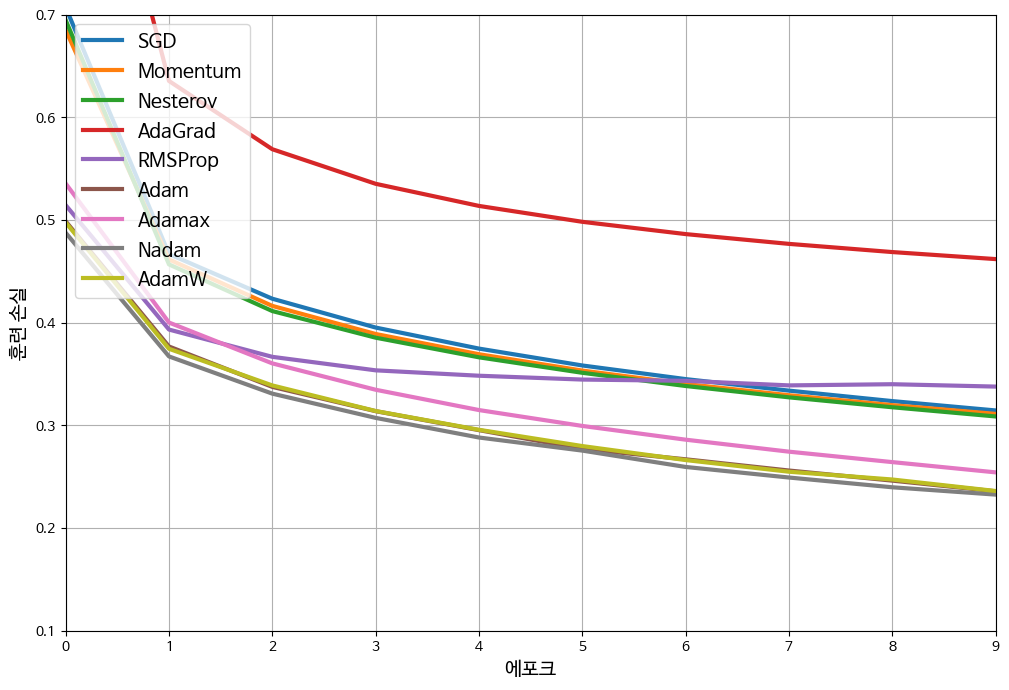

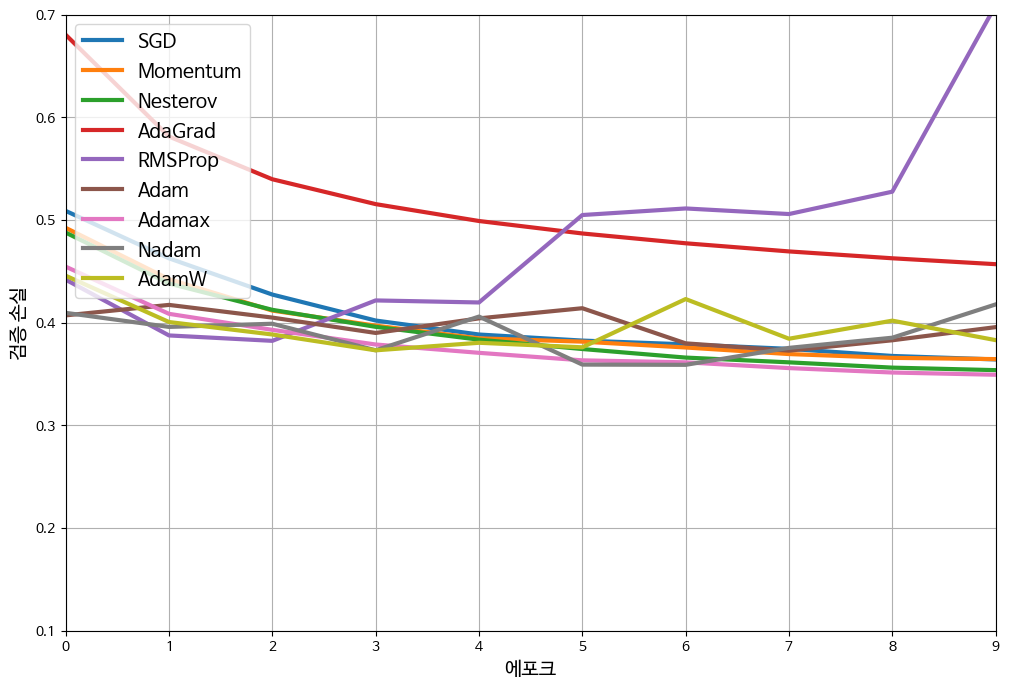

In [96]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Î™®Îì† ÏòµÌã∞ÎßàÏù¥Ï†ÄÏùò ÌïôÏäµ Í≥°ÏÑ† ÏãúÍ∞ÅÌôî

for loss in ("loss", "val_loss"):
    plt.figure(figsize=(12, 8))
    opt_names = "SGD Momentum Nesterov AdaGrad RMSProp Adam Adamax Nadam AdamW"
    for history, opt_name in zip((history_sgd, history_momentum, history_nesterov,
                                  history_adagrad, history_rmsprop, history_adam,
                                  history_adamax, history_nadam, history_adamw),
                                 opt_names.split()):
        plt.plot(history.history[loss], label=f"{opt_name}", linewidth=3)

    plt.grid()
    plt.xlabel("ÏóêÌè¨ÌÅ¨")
    plt.ylabel({"loss": "ÌõàÎ†® ÏÜêÏã§", "val_loss": "Í≤ÄÏ¶ù ÏÜêÏã§"}[loss])
    plt.legend(loc="upper left")
    plt.axis([0, 9, 0.1, 0.7])
    plt.show()

## ÌïôÏäµÎ•† Ïä§ÏºÄÏ§ÑÎßÅ

### Í±∞Îì≠Ï†úÍ≥± Í∏∞Î∞ò Ïä§ÏºÄÏ§ÑÎßÅ

learning_rate = initial_learning_rate / (1 + step / decay_steps)**power

ÏºÄÎùºÏä§Îäî `power = 1`ÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.

**ÎÖ∏Ìä∏**: ÏòµÌã∞ÎßàÏù¥Ï†ÄÏùò `decay` Îß§Í∞úÎ≥ÄÏàòÎäî deprecated ÎêòÏóàÏäµÎãàÎã§. `decay` Îß§Í∞úÎ≥ÄÏàòÎ•º Í∞ÄÏßÑ Íµ¨Ìòï ÏòµÌã∞ÎßàÏù¥Ï†ÄÎäî `tf.keras.optimizers.legacy`Ïóê ÏïÑÏßÅ ÏûàÏäµÎãàÎã§. ÌïòÏßÄÎßå Í∑∏ÎåÄÏã† `tf.keras.optimizers.schedules`Î•º ÏÇ¨Ïö©Ìï¥Ïïº Ìï©ÎãàÎã§.

In [ ]:
# DEPRECATED:
optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=0.01, decay=1e-4)

In [98]:
# RECOMMENDED:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    initial_learning_rate=0.01,
    decay_steps=10_000,
    decay_rate=1.0,
    staircase=False
)
optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule)

`InverseTimeDecay` Ïä§ÏºÄÏ§ÑÎü¨Îäî `learning_rate = initial_learning_rate / (1 + decay_rate * step / decay_step)`Î•º ÏÇ¨Ïö©Ìï©ÎãàÎã§. `staircase = True`Î°ú ÏßÄÏ†ïÌïòÎ©¥ `step / decay_steps`Î•º `floor(step / decay_step)`ÏúºÎ°ú Î∞îÍøâÎãàÎã§.

In [99]:
history_power_scheduling = build_and_train_model(optimizer)  # Ï∂îÍ∞Ä ÏΩîÎìú

Epoch 1/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 3ms/step - accuracy: 0.6710 - loss: 0.9883 - val_accuracy: 0.8274 - val_loss: 0.4811
Epoch 2/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8273 - loss: 0.4894 - val_accuracy: 0.8368 - val_loss: 0.4403
Epoch 3/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8458 - loss: 0.4381 - val_accuracy: 0.8468 - val_loss: 0.4199
Epoch 4/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 2ms/step - accuracy: 0.8557 - loss: 0.4104 - val_accuracy: 0.8500 - val_loss: 0.4064
Epoch 5/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 2ms/step - accuracy: 0.8613 - loss: 0.3922 - val_accuracy: 0.8534 - val_loss: 0.3974
Epoch 6/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8658 - loss: 0.3785 - val_accuracy: 0.8554

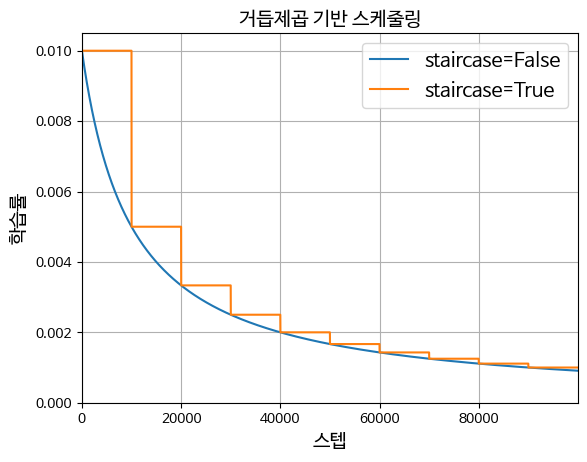

In [100]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Ïù¥ ÏÖÄÏùÄ Í±∞Îì≠Ï†úÍ≥± Í∏∞Î∞ò Ïä§ÏºÄÏ§ÑÎßÅÏùÑ ÌëúÏãúÌï©ÎãàÎã§.

initial_learning_rate = 0.01
decay_rate = 1.0
decay_steps = 10_000

steps = np.arange(100_000)
lrs = initial_learning_rate / (1 + decay_rate * steps / decay_steps)
lrs2 = initial_learning_rate / (1 + decay_rate * np.floor(steps / decay_steps))

plt.plot(steps, lrs,  "-", label="staircase=False")
plt.plot(steps, lrs2,  "-", label="staircase=True")
plt.axis([0, steps.max(), 0, 0.0105])
plt.xlabel("Ïä§ÌÖù")
plt.ylabel("ÌïôÏäµÎ•†")
plt.title("Í±∞Îì≠Ï†úÍ≥± Í∏∞Î∞ò Ïä§ÏºÄÏ§ÑÎßÅ", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

### ÏßÄÏàò Í∏∞Î∞ò Ïä§ÏºÄÏ§ÑÎßÅ

```python
learning_rate = initial_learning_rate * decay_rate ** (step / decay_steps)
```

In [101]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=20_000,
    decay_rate=0.1,
    staircase=False
)
optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule)

In [102]:
history_exponential_scheduling = build_and_train_model(optimizer)  # Ï∂îÍ∞Ä ÏΩîÎìú

Epoch 1/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 2ms/step - accuracy: 0.6855 - loss: 0.9314 - val_accuracy: 0.8308 - val_loss: 0.4871
Epoch 2/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 2ms/step - accuracy: 0.8295 - loss: 0.4916 - val_accuracy: 0.8392 - val_loss: 0.4479
Epoch 3/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8463 - loss: 0.4421 - val_accuracy: 0.8472 - val_loss: 0.4271
Epoch 4/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 2ms/step - accuracy: 0.8570 - loss: 0.4152 - val_accuracy: 0.8564 - val_loss: 0.4118
Epoch 5/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 2ms/step - accuracy: 0.8632 - loss: 0.3971 - val_accuracy: 0.8606 - val_loss: 0.4001
Epoch 6/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 2ms/step - accuracy: 0.8674 - loss: 0.3841 - val_accuracy: 0.8622

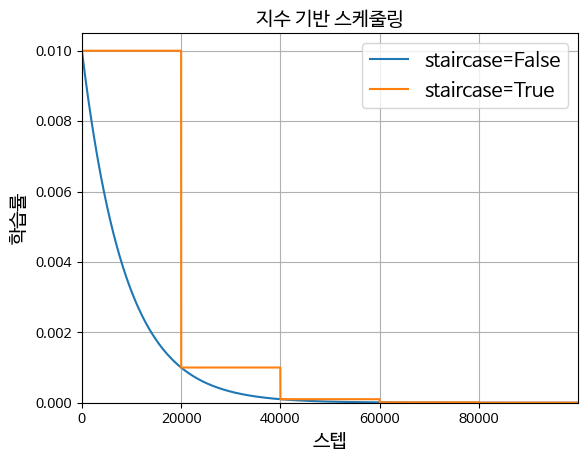

In [103]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Ïù¥ ÏÖÄÏùÄ ÏßÄÏàò Í∏∞Î∞ò Ïä§ÏºÄÏ§ÑÎßÅÏùÑ ÌëúÏãúÌï©ÎãàÎã§.

initial_learning_rate = 0.01
decay_rate = 0.1
decay_steps = 20_000

steps = np.arange(100_000)
lrs = initial_learning_rate * decay_rate ** (steps / decay_steps)
lrs2 = initial_learning_rate * decay_rate ** np.floor(steps / decay_steps)

plt.plot(steps, lrs,  "-", label="staircase=False")
plt.plot(steps, lrs2,  "-", label="staircase=True")
plt.axis([0, steps.max(), 0, 0.0105])
plt.xlabel("Ïä§ÌÖù")
plt.ylabel("ÌïôÏäµÎ•†")
plt.title("ÏßÄÏàò Í∏∞Î∞ò Ïä§ÏºÄÏ§ÑÎßÅ", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

ÏºÄÎùºÏä§Îäî ÏÇ¨Ïö©Ïûê Ï†ïÏùò Ïä§ÏºÄÏ§ÑÎßÅ Ìï®ÏàòÎ•º ÏúÑÌï¥ `LearningRateScheduler` ÏΩúÎ∞± ÌÅ¥ÎûòÏä§Î•º Ï†úÍ≥µÌï©ÎãàÎã§. Ïù¥Î•º ÏÇ¨Ïö©Ìï¥ ÏßÄÏàò Í∏∞Î∞ò Í∞êÏá†Î•º Íµ¨ÌòÑÌïòÎäî Î∞©Î≤ïÏùÑ ÏÇ¥Ìé¥ Î≥¥Í≤üÏäµÎãàÎã§. Ïó¨Í∏∞ÏóêÏÑúÎäî Ïä§ÌÖùÏù¥ ÏïÑÎãàÎùº ÏóêÌè¨ÌÅ¨ÎßàÎã§ ÌïôÏäµÎ•†Ïù¥ Î∞îÎÄùÎãàÎã§.

In [104]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1 ** (epoch / 20)

In [105]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 ** (epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [106]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Ìå®ÏÖò MNISTÏö© Î™®Îç∏ ÎπåÎìú Î∞è Ïª¥ÌååÏùº

tf.random.set_seed(42)
model = build_model()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])

In [107]:
n_epochs = 20

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/20
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 3ms/step - accuracy: 0.6725 - loss: 0.9804 - val_accuracy: 0.8296 - val_loss: 0.4883 - learning_rate: 0.0100
Epoch 2/20
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8286 - loss: 0.4892 - val_accuracy: 0.8346 - val_loss: 0.4554 - learning_rate: 0.0089
Epoch 3/20
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 2ms/step - accuracy: 0.8458 - loss: 0.4343 - val_accuracy: 0.8436 - val_loss: 0.4336 - learning_rate: 0.0079
Epoch 4/20
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 2ms/step - accuracy: 0.8570 - loss: 0.4043 - val_accuracy: 0.8484 - val_loss: 0.4151 - learning_rate: 0.0071
Epoch 5/20
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8638 - loss: 0.3837 - val_accuracy: 0.8540 - val_loss: 0.4030 - learning_rate: 0.0063
Epoch 6/20
1719/1719 ‚îÅ‚îÅ‚îÅ

ÎòêÎäî Ïä§ÏºÄÏ§Ñ Ìï®ÏàòÍ∞Ä ÌòÑÏû¨ ÌïôÏäµÎ•†ÏùÑ Îëê Î≤àÏß∏ Ïù∏ÏàòÎ°ú Î∞õÏùÑ Ïàò ÏûàÏäµÎãàÎã§:

In [108]:
def exponential_decay_fn(epoch, lr):
    return lr * 0.1 ** (1 / 20)

**Ï∂îÍ∞Ä ÏûêÎ£å**: Í∞Å ÏóêÌè¨ÌÅ¨Í∞Ä ÏïÑÎãå Í∞Å Î∞òÎ≥µÎßàÎã§ ÌïôÏäµÎ•†ÏùÑ ÏóÖÎç∞Ïù¥Ìä∏ÌïòÎäî ÏÇ¨Ïö©Ïûê Ï†ïÏùò Ïä§ÏºÄÏ§ÑÎßÅ Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÎ†§Î©¥ ÏûêÏ≤¥ ÏΩúÎ∞± ÌÅ¥ÎûòÏä§Î•º ÏûëÏÑ±Ìï† Ïàò ÏûàÏäµÎãàÎã§:

In [109]:
K = tf.keras.backend

class ExponentialDecay(tf.keras.callbacks.Callback):
    def __init__(self, n_steps=40_000):
        super().__init__()
        self.n_steps = n_steps

    def on_batch_begin(self, batch, logs=None):
        # Ï∞∏Í≥†: `batch` Ïù∏ÏàòÎäî Í∞Å ÏóêÌè¨ÌÅ¨ÎßàÎã§ Ïû¨ÏÑ§Ï†ïÎê©ÎãàÎã§.
        lr = K.get_value(self.model.optimizer.learning_rate)
        new_learning_rate = lr * 0.1 ** (1 / self.n_steps)
        K.set_value(self.model.optimizer.learning_rate, new_learning_rate)

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = K.get_value(self.model.optimizer.learning_rate)

In [110]:
lr0 = 0.01
model = build_model()
optimizer = tf.keras.optimizers.SGD(learning_rate=lr0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])

In [ ]:
import math

batch_size = 32
n_steps = n_epochs * math.ceil(len(X_train) / batch_size)
exp_decay = ExponentialDecay(n_steps)
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid),
                    callbacks=[exp_decay])

### Íµ¨Í∞ÑÎ≥Ñ Í≥†Ï†ï Ïä§ÏºÄÏ§ÑÎßÅ

In [113]:
lr_schedule = tf.keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=[50_000, 80_000],
    values=[0.01, 0.005, 0.001]
)
optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule)

In [ ]:
history_piecewise_scheduling = build_and_train_model(optimizer)  # Ï∂îÍ∞Ä ÏΩîÎìú

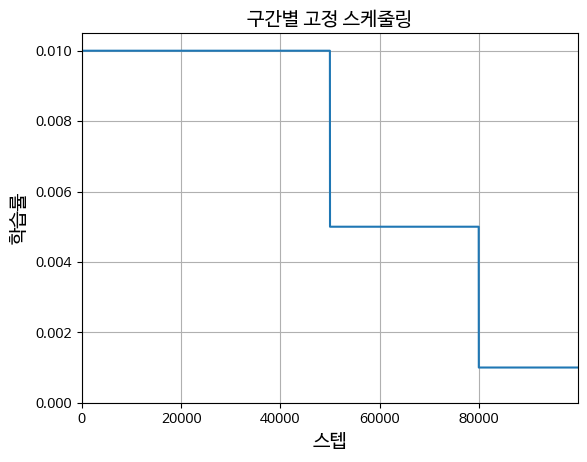

In [114]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Ïù¥ ÏÖÄÏùÄ Íµ¨Í∞ÑÎ≥Ñ Í≥†Ï†ï Ïä§ÏºÄÏ§ÑÎßÅÏùÑ ÌëúÏãúÌï©ÎãàÎã§.

boundaries = [50_000, 80_000]
values = [0.01, 0.005, 0.001]

steps = np.arange(100_000)

lrs = np.full(len(steps), values[0])
for boundary, value in zip(boundaries, values[1:]):
    lrs[boundary:] = value

plt.plot(steps, lrs, "-")
plt.axis([0, steps.max(), 0, 0.0105])
plt.xlabel("Ïä§ÌÖù")
plt.ylabel("ÌïôÏäµÎ•†")
plt.title("Íµ¨Í∞ÑÎ≥Ñ Í≥†Ï†ï Ïä§ÏºÄÏ§ÑÎßÅ", fontsize=14)
plt.grid(True)
plt.show()

ÏßÄÏàò Í∏∞Î∞ò Ïä§ÏºÄÏ§ÑÎßÅÏóêÏÑú ÌñàÎçò Í≤ÉÏ≤òÎüº Íµ¨Í∞ÑÎ≥Ñ Í≥†Ï†ï Ïä§ÏºÄÏ§ÑÎßÅÏùÑ ÏàòÎèôÏúºÎ°ú Íµ¨ÌòÑÌï† ÏàòÎèÑ ÏûàÏäµÎãàÎã§:

In [115]:
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [116]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Ïù¥ ÏÖÄÏùÄ Íµ¨Í∞ÑÎ≥Ñ Í≥†Ï†ï Ïä§ÏºÄÏ§ÑÎßÅÏùÑ Ï†ïÏùòÌïòÎäî ÏùºÎ∞òÏ†ÅÏù∏ Î∞©Î≤ïÏùÑ Î≥¥Ïó¨Ï§çÎãàÎã§.

def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[(boundaries > epoch).argmax() - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [117]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Ïù¥Ï†ÑÍ≥º Í∞ôÏù¥ tf.keras.callbacks.LearningRateSchedulerÎ•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.

n_epochs = 25

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = build_model()
optimizer = tf.keras.optimizers.Nadam(learning_rate=lr0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 3ms/step - accuracy: 0.7612 - loss: 0.6669 - val_accuracy: 0.8274 - val_loss: 0.4603 - learning_rate: 0.0100
Epoch 2/25
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 2ms/step - accuracy: 0.8413 - loss: 0.4570 - val_accuracy: 0.8322 - val_loss: 0.4679 - learning_rate: 0.0100
Epoch 3/25
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 2ms/step - accuracy: 0.8514 - loss: 0.4266 - val_accuracy: 0.8332 - val_loss: 0.4524 - learning_rate: 0.0100
Epoch 4/25
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 2ms/step - accuracy: 0.8532 - loss: 0.4225 - val_accuracy: 0.8424 - val_loss: 0.4558 - learning_rate: 0.0100
Epoch 5/25
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 2ms/step - accuracy: 0.8569 - loss: 0.4085 - val_accuracy: 0.8438 - val_loss: 0.4734 - learning_rate: 0.0100
Epoch 6/25
1719/1719 ‚îÅ‚îÅ‚îÅ

ÏßÄÍ∏àÍπåÏßÄ `InverseTimeDecay`, `ExponentialDecay`, `PiecewiseConstantDecay`Î•º ÏÇ¥Ìé¥ Î≥¥ÏïòÏäµÎãàÎã§. `tf.keras.optimizers.schedules`ÏóêÎäî Ïù¥Ïô∏Ïóê Î™á Í∞úÏùò Ïä§ÏºÄÏ§ÑÎü¨Í∞Ä Îçî ÏûàÏäµÎãàÎã§. Ï†ÑÏ≤¥ Î¶¨Ïä§Ìä∏Îäî Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§.

In [119]:
for name in sorted(dir(tf.keras.optimizers.schedules)):
    if name[0] == name[0].lower():  # must start with capital letter
        continue
    scheduler_class = getattr(tf.keras.optimizers.schedules, name)
    print(f"‚Ä¢ {name} ‚Äì {scheduler_class.__doc__.splitlines()[0]}")

‚Ä¢ CosineDecay ‚Äì A `LearningRateSchedule` that uses a cosine decay with optional warmup.
‚Ä¢ CosineDecayRestarts ‚Äì A `LearningRateSchedule` that uses a cosine decay schedule with restarts.
‚Ä¢ ExponentialDecay ‚Äì A `LearningRateSchedule` that uses an exponential decay schedule.
‚Ä¢ InverseTimeDecay ‚Äì A `LearningRateSchedule` that uses an inverse time decay schedule.
‚Ä¢ LearningRateSchedule ‚Äì The learning rate schedule base class.
‚Ä¢ PiecewiseConstantDecay ‚Äì A `LearningRateSchedule` that uses a piecewise constant decay schedule.
‚Ä¢ PolynomialDecay ‚Äì A `LearningRateSchedule` that uses a polynomial decay schedule.


### ÏÑ±Îä• Í∏∞Î∞ò Ïä§ÏºÄÏ§ÑÎßÅ

In [120]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Î™®Îç∏ ÎπåÎìú Î∞è Ïª¥ÌååÏùº

model = build_model()
optimizer = tf.keras.optimizers.SGD(learning_rate=lr0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])

In [121]:
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 2ms/step - accuracy: 0.6693 - loss: 1.0007 - val_accuracy: 0.8248 - val_loss: 0.4954 - learning_rate: 0.0100
Epoch 2/25
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 2ms/step - accuracy: 0.8286 - loss: 0.4907 - val_accuracy: 0.8348 - val_loss: 0.4530 - learning_rate: 0.0100
Epoch 3/25
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 2ms/step - accuracy: 0.8473 - loss: 0.4346 - val_accuracy: 0.8380 - val_loss: 0.4339 - learning_rate: 0.0100
Epoch 4/25
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 2ms/step - accuracy: 0.8565 - loss: 0.4025 - val_accuracy: 0.8450 - val_loss: 0.4178 - learning_rate: 0.0100
Epoch 5/25
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 2ms/step - accuracy: 0.8637 - loss: 0.3802 - val_accuracy: 0.8492 - val_loss: 0.4041 - learning_rate: 0.0100
Epoch 6/25
1719/1719 ‚îÅ‚îÅ‚îÅ

In [ ]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Ïù¥ ÏÖÄÏùÄ ÏÑ±Îä• Í∏∞Î∞ò Ïä§ÏºÄÏ§ÑÎßÅÏùÑ ÌëúÏãúÌï©ÎãàÎã§.

plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("ÏóêÌè¨ÌÅ¨")
plt.ylabel("ÌïôÏäµÎ•†", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Í≤ÄÏ¶ù ÏÜêÏã§', color='r')
ax2.tick_params('y', colors='r')

plt.title("ÌèâÌÉÑ ÏßÄÏó≠ÏóêÏÑú LR Í∞êÏÜåÌïòÍ∏∞", fontsize=14)
plt.show()

### 1ÏÇ¨Ïù¥ÌÅ¥ Ïä§ÏºÄÏ§ÑÎßÅ

`ExponentialLearningRate` ÏÇ¨Ïö©Ïûê ÏßÄÏ†ï ÏΩúÎ∞±ÏùÄ ÌõàÎ†®Ïùò Í∞Å Î∞∞ÏπòÍ∞Ä ÎÅùÎÇ† ÎïåÎßàÎã§ ÌïôÏäµÎ•†ÏùÑ ÏóÖÎç∞Ïù¥Ìä∏Ìï©ÎãàÎã§. ÌïôÏäµÎ•†Ïóê ÏÉÅÏàò `factor`Î•º Í≥±Ìï©ÎãàÎã§. ÎòêÌïú Í∞Å Î∞∞ÏπòÏóêÏÑú ÌïôÏäµÎ•†Í≥º ÏÜêÏã§ÏùÑ Ï†ÄÏû•Ìï† Ïàò ÏûàÏäµÎãàÎã§. `logs["loss"]`Îäî Ïã§Ï†úÎ°ú ÏóêÌè¨ÌÅ¨ ÏãúÏûë Ïù¥ÌõÑÏùò ÌèâÍ∑† ÏÜêÏã§Ïù∏Îç∞ Ïö∞Î¶¨Îäî ÎåÄÏã† Î∞∞Ïπò ÏÜêÏã§ÏùÑ Ï†ÄÏû•ÌïòÍ≥† Ïã∂ÏäµÎãàÎã§. Îî∞ÎùºÏÑú ÏóêÌè¨ÌÅ¨ ÏãúÏûë Ïù¥ÌõÑ Î∞∞Ïπò ÌöüÏàòÏùò ÌèâÍ∑†ÏùÑ Í≥ÑÏÇ∞ÌïòÏó¨ ÏßÄÍ∏àÍπåÏßÄÏùò Ï¥ù ÏÜêÏã§ÏùÑ Íµ¨Ìïú Îã§Ïùå Ïù¥Ï†Ñ Î∞∞ÏπòÏùò Ï¥ù ÏÜêÏã§ÏùÑ ÎπºÏÑú ÌòÑÏû¨ Î∞∞ÏπòÏùò ÏÜêÏã§ÏùÑ Íµ¨Ìï¥Ïïº Ìï©ÎãàÎã§.

In [123]:
K = tf.keras.backend

class ExponentialLearningRate(tf.keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []

    def on_epoch_begin(self, epoch, logs=None):
        self.sum_of_epoch_losses = 0

    def on_batch_end(self, batch, logs=None):
        mean_epoch_loss = logs["loss"]  # ÏßÄÍ∏àÍπåÏßÄÏùò ÌèâÍ∑† ÏÜêÏã§
        new_sum_of_epoch_losses = mean_epoch_loss * (batch + 1)
        batch_loss = new_sum_of_epoch_losses - self.sum_of_epoch_losses
        self.sum_of_epoch_losses = new_sum_of_epoch_losses
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(batch_loss)
        K.set_value(self.model.optimizer.learning_rate,
                    self.model.optimizer.learning_rate * self.factor)

`find_learning_rate()` Ìï®ÏàòÎäî `ExponentialLearningRate` ÏΩúÎ∞±ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Î™®Îç∏ÏùÑ ÌõàÎ†®ÌïòÍ≥† ÌïôÏäµÎ•†Í≥º Ìï¥Îãπ Î∞∞Ïπò ÏÜêÏã§ÏùÑ Î∞òÌôòÌï©ÎãàÎã§. ÎßàÏßÄÎßâÏóêÎäî Î™®Îç∏Í≥º Ìï¥Îãπ ÏòµÌã∞ÎßàÏù¥Ï†ÄÎ•º Ï¥àÍ∏∞ ÏÉÅÌÉúÎ°ú Î≥µÏõêÌï©ÎãàÎã§.

In [124]:
def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=1e-4,
                       max_rate=1):
    init_weights = model.get_weights()
    iterations = math.ceil(len(X) / batch_size) * epochs
    factor = (max_rate / min_rate) ** (1 / iterations)
    init_lr = K.get_value(model.optimizer.learning_rate)
    K.set_value(model.optimizer.learning_rate, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.learning_rate, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

`plot_lr_vs_loss()` Ìï®ÏàòÎäî ÌïôÏäµÎ•†Í≥º ÏÜêÏã§ÏùÑ ÌîåÎ°ØÌï©ÎãàÎã§. 1ÏÇ¨Ïù¥ÌÅ¥Ïùò ÏµúÎåÄ ÌïôÏäµÎ•†Î°ú ÏÇ¨Ïö©Ìï† ÏµúÏ†ÅÏùò ÌïôÏäµÎ•†ÏùÄ Í≥°ÏÑ†Ïùò Îß® ÏïÑÎûòÏóê ÏûàÏäµÎãàÎã§.

In [125]:
def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses, "b")
    plt.gca().set_xscale('log')
    max_loss = losses[0] + min(losses)
    plt.hlines(min(losses), min(rates), max(rates), color="k")
    plt.axis([min(rates), max(rates), 0, max_loss])
    plt.xlabel("ÌïôÏäµÎ•†")
    plt.ylabel("ÏÜêÏã§")
    plt.grid()

Í∞ÑÎã®Ìïú Ìå®ÏÖò MNIST Î™®Îç∏ÏùÑ ÎπåÎìúÌïòÍ≥† Ïª¥ÌååÏùºÌï¥ Î≥¥Í≤†ÏäµÎãàÎã§:

In [126]:
model = build_model()
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=["accuracy"])

Ïù¥Ï†ú 1ÏÇ¨Ïù¥ÌÅ¥Ïóê ÎåÄÌïú ÏµúÏ†ÅÏùò ÏµúÎåÄ ÌïôÏäµÎ•†ÏùÑ Ï∞æÏïÑÎ≥¥Í≤†ÏäµÎãàÎã§:

In [ ]:
batch_size = 128
rates, losses = find_learning_rate(model, X_train, y_train, epochs=1,
                                   batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

1ÏÇ¨Ïù¥ÌÅ¥Ïóê ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎäî ÏµúÎåÄ ÌïôÏäµÎ•†ÏùÄ 10<sup>-1</sup> Ï†ïÎèÑÏù∏ Í≤É Í∞ôÏäµÎãàÎã§.

`OneCycleScheduler` ÏÇ¨Ïö©Ïûê ÏßÄÏ†ï ÏΩúÎ∞±ÏùÄ Í∞Å Î∞∞ÏπòÍ∞Ä ÏãúÏûëÎê† Îïå ÌïôÏäµÎ•†ÏùÑ ÏóÖÎç∞Ïù¥Ìä∏Ìï©ÎãàÎã§. Ïù¥ Ï±ÖÏóê ÏÑ§Î™ÖÎêú ÎÖºÎ¶¨Î•º Ï†ÅÏö©Ìï©ÎãàÎã§. ÌõàÎ†®Ïùò ÏïΩ Ï†àÎ∞ò ÎèôÏïà ÌïôÏäµ ÏÜçÎèÑÎ•º ÏÑ†ÌòïÏ†ÅÏúºÎ°ú Ï¶ùÍ∞ÄÏãúÌÇ® Îã§Ïùå, Îã§Ïãú Ï¥àÍ∏∞ ÌïôÏäµ ÏÜçÎèÑÎ°ú ÏÑ†ÌòïÏ†ÅÏúºÎ°ú Í∞êÏÜåÏãúÌÇ§Í≥†, ÎßàÏßÄÎßâÏúºÎ°ú ÌõàÎ†®Ïùò ÎßàÏßÄÎßâ Î∂ÄÎ∂ÑÏóêÏÑúÎäî ÌïôÏäµ ÏÜçÎèÑÎ•º ÏÑ†ÌòïÏ†ÅÏúºÎ°ú 0Ïóê Í∞ÄÍπùÍ≤å Í∞êÏÜåÏãúÌÇµÎãàÎã§.

In [128]:
class OneCycleScheduler(tf.keras.callbacks.Callback):
    def __init__(self, iterations, max_lr=1e-3, start_lr=None,
                 last_iterations=None, last_lr=None):
        self.iterations = iterations
        self.max_lr = max_lr
        self.start_lr = start_lr or max_lr / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_lr = last_lr or self.start_lr / 1000
        self.iteration = 0

    def _interpolate(self, iter1, iter2, lr1, lr2):
        return (lr2 - lr1) * (self.iteration - iter1) / (iter2 - iter1) + lr1

    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            lr = self._interpolate(0, self.half_iteration, self.start_lr,
                                   self.max_lr)
        elif self.iteration < 2 * self.half_iteration:
            lr = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                   self.max_lr, self.start_lr)
        else:
            lr = self._interpolate(2 * self.half_iteration, self.iterations,
                                   self.start_lr, self.last_lr)
        self.iteration += 1
        K.set_value(self.model.optimizer.learning_rate, lr)

Í∞ÑÎã®Ìïú Ìå®ÏÖò MNIST Î™®Îç∏ÏùÑ ÎπåÎìúÌïòÍ≥† Ïª¥ÌååÏùºÌïú Îã§Ïùå `OneCycleScheduler` ÏΩúÎ∞±ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÌõàÎ†®Ìï¥ Î≥¥Í≤†ÏäµÎãàÎã§:

In [ ]:
model = build_model()
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])
n_epochs = 25
onecycle = OneCycleScheduler(math.ceil(len(X_train) / batch_size) * n_epochs,
                             max_lr=0.1)
history = model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid, y_valid),
                    callbacks=[onecycle])

# Í∑úÏ†úÎ•º ÌÜµÌïú Í≥ºÏ†ÅÌï© Î∞©ÏßÄ

## $\ell_1$Í≥º $\ell_2$ Í∑úÏ†ú

In [130]:
layer = tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal",
                              kernel_regularizer=tf.keras.regularizers.l2(0.01))

ÎòêÎäî Í≥ÑÏàòÍ∞Ä 0.1Ïù∏ ‚Ñì<sub>1</sub> Ï†ïÍ∑úÌôîÏùò Í≤ΩÏö∞ `l1(0.1)`ÏùÑ ÏÇ¨Ïö©ÌïòÍ±∞ÎÇò, Í≥ÑÏàòÍ∞Ä Í∞ÅÍ∞Å 0.1Í≥º 0.01Ïù∏ ‚Ñì<sub>1</sub> Î∞è ‚Ñì<sub>2</sub> Ï†ïÍ∑úÌôîÏùò Í≤ΩÏö∞ `l1_l2(0.1, 0.01)`ÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.

In [131]:
tf.random.set_seed(42)  # Ï∂îÍ∞Ä ÏΩîÎìú - Ïû¨ÌòÑÏÑ±ÏùÑ ÏúÑÌïú

In [132]:
from functools import partial

RegularizedDense = partial(tf.keras.layers.Dense,
                           activation="relu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=tf.keras.regularizers.l2(0.01))

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(100),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])

In [133]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Î™®Îç∏ Ïª¥ÌååÏùº Î∞è ÌõàÎ†®
optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=2,
                    validation_data=(X_valid, y_valid))

Epoch 1/2
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 3ms/step - accuracy: 0.7097 - loss: 4.0897 - val_accuracy: 0.8222 - val_loss: 1.8648
Epoch 2/2
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 2ms/step - accuracy: 0.8135 - loss: 1.6268 - val_accuracy: 0.8238 - val_loss: 1.1207


## ÎìúÎ°≠ÏïÑÏõÉ

In [134]:
tf.random.set_seed(42)  # Ï∂îÍ∞Ä ÏΩîÎìú - Ïû¨ÌòÑÏÑ±ÏùÑ ÏúÑÌïú

In [135]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [136]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Î™®Îç∏ Ïª¥ÌååÏùº Î∞è ÌõàÎ†®
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 4ms/step - accuracy: 0.6800 - loss: 0.8785 - val_accuracy: 0.8192 - val_loss: 0.4634
Epoch 2/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8104 - loss: 0.5206 - val_accuracy: 0.8372 - val_loss: 0.4181
Epoch 3/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 2ms/step - accuracy: 0.8210 - loss: 0.4880 - val_accuracy: 0.8564 - val_loss: 0.3853
Epoch 4/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 2ms/step - accuracy: 0.8317 - loss: 0.4618 - val_accuracy: 0.8552 - val_loss: 0.3827
Epoch 5/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 2ms/step - accuracy: 0.8371 - loss: 0.4401 - val_accuracy: 0.8604 - val_loss: 0.3761
Epoch 6/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8403 - loss: 0.4298 - val_accuracy: 0.858

ÌõàÎ†® Ï†ïÌôïÎèÑÍ∞Ä Í≤ÄÏ¶ù Ï†ïÌôïÎèÑÎ≥¥Îã§ ÎÇÆÏùÄ Í≤ÉÏ≤òÎüº Î≥¥Ïù¥ÏßÄÎßå Ïù¥Îäî ÎìúÎ°≠ÏïÑÏõÉÏù¥ ÌõàÎ†® Ï§ëÏóêÎßå ÌôúÏÑ±ÌôîÎêòÍ∏∞ ÎïåÎ¨∏ÏûÖÎãàÎã§. ÌõàÎ†® ÌõÑ(Ï¶â, ÎìúÎ°≠ÏïÑÏõÉÏùÑ ÎÅà ÏÉÅÌÉúÏóêÏÑú) ÌõàÎ†® ÏÑ∏Ìä∏ÏóêÏÑú Î™®Îç∏ÏùÑ ÌèâÍ∞ÄÌïòÎ©¥ Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ Î∞è ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑÎ≥¥Îã§ ÏïΩÍ∞Ñ ÎÜíÏùÄ "Ïã§Ï†ú" ÌõàÎ†® Ï†ïÌôïÎèÑÎ•º ÏñªÏùÑ Ïàò ÏûàÏäµÎãàÎã§:

In [137]:
model.evaluate(X_train, y_train)

1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8771 - loss: 0.3255


[0.3289027214050293, 0.8752363920211792]

In [138]:
model.evaluate(X_test, y_test)

313/313 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - accuracy: 0.8575 - loss: 0.3779


[0.38351914286613464, 0.8539999723434448]

**Ï∞∏Í≥†**: SELUÎ•º ÏÇ¨Ïö©ÌïòÏó¨ ÏûêÍ∞Ä Ï†ïÍ∑úÌôî Ïã†Í≤ΩÎßùÏùÑ Íµ¨Ï∂ïÌïòÎ†§Î©¥ `Dropout` ÎåÄÏã† `AlphaDropout`ÏùÑ ÏÇ¨Ïö©Ìï¥Ïïº Ìï©ÎãàÎã§.

## MC ÎìúÎ°≠ÏïÑÏõÉ

In [139]:
tf.random.set_seed(42)  # Ï∂îÍ∞Ä ÏΩîÎìú - Ïû¨ÌòÑÏÑ±ÏùÑ ÏúÑÌïú

In [140]:
y_probas = np.stack([model(X_test, training=True)
                     for sample in range(100)])
y_proba = y_probas.mean(axis=0)

In [141]:
model.predict(X_test[:1]).round(3)

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 214ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.088, 0.   , 0.138, 0.   ,
        0.774]], dtype=float32)

In [142]:
y_proba[0].round(3)

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.265, 0.   , 0.162, 0.009,
       0.563], dtype=float32)

In [143]:
y_std = y_probas.std(axis=0)
y_std[0].round(3)

array([0.   , 0.   , 0.   , 0.001, 0.   , 0.25 , 0.   , 0.147, 0.036,
       0.249], dtype=float32)

In [144]:
y_pred = y_proba.argmax(axis=1)
accuracy = (y_pred == y_test).sum() / len(y_test)
accuracy

0.8542

In [145]:
class MCDropout(tf.keras.layers.Dropout):
    def call(self, inputs, training=None):
        return super().call(inputs, training=True)

In [146]:
# Ï∂îÍ∞Ä ÏΩîÎìú - ÏãúÌÄÄÏÖú Î™®Îç∏ÏóêÏÑú DropoutÏùÑ MCDropoutÏúºÎ°ú Î≥ÄÌôòÌïòÎäî Î∞©Î≤ïÏùÑ Î≥¥Ïó¨Ï§çÎãàÎã§.
Dropout = tf.keras.layers.Dropout
mc_model = tf.keras.Sequential([
    MCDropout(layer.rate) if isinstance(layer, Dropout) else layer
    for layer in model.layers
])
mc_model.set_weights(model.get_weights())

In [147]:
mc_model.summary()

Model: "sequential_24"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                         ‚îÉ Output Shape                ‚îÉ         Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ flatten_22 (Flatten)                 ‚îÇ (None, 784)                 ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ mc_dropout (MCDropout)               ‚îÇ (None, 784)                 ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_88 (Dense)                     ‚îÇ (None, 100)                 ‚îÇ          78,500 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ mc_dropout_1 (MCDropout)             ‚îÇ (None, 100)                 ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_89 (Dense)                     ‚îÇ (None, 100)                 ‚îÇ          10,100 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ mc_dropout_2 (MCDropout)             ‚îÇ (None, 100)                 ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_90 (Dense)                     ‚îÇ (None, 10)                  ‚îÇ           1,010 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 89,610 (350.04 KB)

 Trainable params: 89,610 (350.04 KB)

 Non-trainable params: 0 (0.00 B)

Ïù¥Ï†ú MC ÎìúÎ°≠ÏïÑÏõÉÍ≥º Ìï®Íªò Î™®Îç∏ÏùÑ ÏÇ¨Ïö©Ìï† Ïàò ÏûàÏäµÎãàÎã§:

In [148]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Î™®Îç∏ÏùÑ Ïû¨ÌõàÎ†®ÌïòÏßÄ ÏïäÍ≥† ÏÇ¨Ïö©ÌïòÎäî Î∞©Î≤ïÏùÑ Î≥¥Ïó¨Ï§çÎãàÎã§.
tf.random.set_seed(42)
np.mean([mc_model.predict(X_test[:1])
         for sample in range(100)], axis=0).round(2)

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 1s/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 17ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 17ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 17ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 16ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 15ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 14ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 15ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 15ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 15ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 14ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 18ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.23, 0.  , 0.18, 0.01, 0.57]],
      dtype=float32)

## Îß•Ïä§-ÎÖ∏Î¶Ñ

In [149]:
dense = tf.keras.layers.Dense(
    100, activation="relu", kernel_initializer="he_normal",
    kernel_constraint=tf.keras.constraints.max_norm(1.))

In [150]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Î™®Îç∏Ïùò Î™®Îì† ÏùÄÎãâÏ∏µÏóê Îß•Ïä§-ÎÖ∏Î¶ÑÏùÑ Ï†ÅÏö©ÌïòÎäî Î∞©Î≤ïÏùÑ Î≥¥Ïó¨Ï§çÎãàÎã§.
MaxNormDense = partial(tf.keras.layers.Dense,
                       activation="relu", kernel_initializer="he_normal",
                       kernel_constraint=tf.keras.constraints.max_norm(1.))

tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(100),
    MaxNormDense(100),
    tf.keras.layers.Dense(10, activation="softmax")
])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 3ms/step - accuracy: 0.7397 - loss: 0.7396 - val_accuracy: 0.8334 - val_loss: 0.4417
Epoch 2/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 2ms/step - accuracy: 0.8443 - loss: 0.4310 - val_accuracy: 0.8440 - val_loss: 0.4031
Epoch 3/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 2ms/step - accuracy: 0.8550 - loss: 0.3915 - val_accuracy: 0.8482 - val_loss: 0.3953
Epoch 4/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 2ms/step - accuracy: 0.8631 - loss: 0.3670 - val_accuracy: 0.8432 - val_loss: 0.4040
Epoch 5/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8696 - loss: 0.3514 - val_accuracy: 0.8522 - val_loss: 0.3882
Epoch 6/10
1719/1719 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 2ms/step - accuracy: 0.8726 - loss: 0.3418 - val_accuracy: 0.8448

# Ïó∞ÏäµÎ¨∏Ï†ú Ìï¥Îãµ

## 1. to 7.

Î∂ÄÎ°ù A Ï∞∏Ï°∞

## 8. CIFAR10Ïóê Îî•Îü¨Îãù Ï†ÅÏö©ÌïòÍ∏∞

### a.
*Î¨∏Ï†ú: 100Í∞úÏùò Îâ¥Îü∞ÏùÑ Í∞ÄÏßÑ ÏùÄÎãâÏ∏µ 20Í∞úÎ°ú Ïã¨Ï∏µ Ïã†Í≤ΩÎßùÏùÑ ÎßåÎì§Ïñ¥Î≥¥ÏÑ∏Ïöî(ÎÑàÎ¨¥ ÎßéÏùÄ Í≤É Í∞ôÏßÄÎßå Ïù¥ Ïó∞ÏäµÎ¨∏Ï†úÏùò ÌïµÏã¨ÏûÖÎãàÎã§). He Ï¥àÍ∏∞ÌôîÏôÄ Swish ÌôúÏÑ±Ìôî Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÏÑ∏Ïöî.*

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(tf.keras.layers.Dense(100,
                                    activation="swish",
                                    kernel_initializer="he_normal"))

### b.
*Î¨∏Ï†ú: Nadam ÏòµÌã∞ÎßàÏù¥Ï†ÄÏôÄ Ï°∞Í∏∞ Ï¢ÖÎ£åÎ•º ÏÇ¨Ïö©ÌïòÏó¨ CIFAR10 Îç∞Ïù¥ÌÑ∞ÏÖãÏóê Ïù¥ ÎÑ§Ìä∏ÏõåÌÅ¨Î•º ÌõàÎ†®ÌïòÏÑ∏Ïöî. „ÖÖ`tf.keras.datasets.cifar10.load_ data()`Î•º ÏÇ¨Ïö©ÌïòÏó¨ Îç∞Ïù¥ÌÑ∞Î•º Ï†ÅÏû¨Ìï† Ïàò ÏûàÏäµÎãàÎã§. Ïù¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÄ 10Í∞úÏùò ÌÅ¥ÎûòÏä§ÏôÄ 32√ó32 ÌÅ¨Í∏∞Ïùò Ïª¨Îü¨ Ïù¥ÎØ∏ÏßÄ 60,000Í∞úÎ°ú Íµ¨ÏÑ±Îê©ÎãàÎã§(50,000Í∞úÎäî ÌõàÎ†®, 10,000Í∞úÎäî ÌÖåÏä§Ìä∏). Îî∞ÎùºÏÑú 10Í∞úÏùò Îâ¥Îü∞Í≥º ÏÜåÌîÑÌä∏Îß•Ïä§ ÌôúÏÑ±Ìôî Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÎäî Ï∂úÎ†•Ï∏µÏù¥ ÌïÑÏöîÌï©ÎãàÎã§. Î™®Îç∏ Íµ¨Ï°∞ÏôÄ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º Î∞îÍøÄ ÎïåÎßàÎã§ Ï†ÅÏ†àÌïú ÌïôÏäµÎ•†ÏùÑ Ï∞æÏïÑÏïº ÌïúÎã§Îäî Í≤ÉÏùÑ Í∏∞ÏñµÌïòÏÑ∏Ïöî.*

Î™®Îç∏Ïóê Ï∂úÎ†•Ï∏µÏùÑ Ï∂îÍ∞ÄÌï©ÎãàÎã§:

In [ ]:
model.add(tf.keras.layers.Dense(10, activation="softmax"))

ÌïôÏäµÎ•†Ïù¥ 5e-5Ïù∏ Nadam ÏòµÌã∞ÎßàÏù¥Ï†ÄÎ•º ÏÇ¨Ïö©Ìï¥ Î≥¥Í≤†ÏäµÎãàÎã§. ÌïôÏäµÎ•† 1e-5, 3e-5, 1e-4, 3e-4, 1e-3, 3e-3 Î∞è 1e-2Î•º ÏãúÎèÑÌïòÍ≥† Í∞ÅÍ∞Å 10Í∞úÏùò ÏóêÌè¨ÌÅ¨Ïóê ÎåÄÌïú ÌïôÏäµ Í≥°ÏÑ†ÏùÑ ÎπÑÍµêÌñàÏäµÎãàÎã§(ÏïÑÎûò TensorBoard ÏΩúÎ∞±ÏùÑ ÏÇ¨Ïö©). 3e-5ÏôÄ 1e-4Ïùò ÌïôÏäµÎ•†Ïù¥ ÍΩ§ Ï¢ãÏïòÍ∏∞ ÎïåÎ¨∏Ïóê 5e-5Î•º ÏÇ¨Ïö©Ìï¥ Î≥¥ÏïòÎäîÎç∞, Ïù¥ ÌïôÏäµÎ•†Ïù¥ ÏïΩÍ∞Ñ Îçî ÎÇòÏùÄ Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨ÏäµÎãàÎã§.

In [ ]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=5e-5)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

CIFAR10 Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Î•º Î°úÎìúÌï¥ Î≥¥Í≤†ÏäµÎãàÎã§. ÎòêÌïú Ï°∞Í∏∞ Ï¢ÖÎ£åÎ•º ÏÇ¨Ïö©ÌïòÎ†§Í≥† ÌïòÎØÄÎ°ú Í≤ÄÏ¶ù ÏÑ∏Ìä∏Í∞Ä ÌïÑÏöîÌï©ÎãàÎã§. ÏõêÎ≥∏ ÌõàÎ†® ÏÑ∏Ìä∏Ïùò Ï≤òÏùå 5,000Í∞úÏùò Ïù¥ÎØ∏ÏßÄÎ•º Í≤ÄÏ¶ù ÏÑ∏Ìä∏Î°ú ÏÇ¨Ïö©ÌïòÍ≤†ÏäµÎãàÎã§:

In [ ]:
cifar10 = tf.keras.datasets.cifar10.load_data()
(X_train_full, y_train_full), (X_test, y_test) = cifar10

X_train = X_train_full[5000:]
y_train = y_train_full[5000:]
X_valid = X_train_full[:5000]
y_valid = y_train_full[:5000]

Ïù¥Ï†ú ÌïÑÏöîÌïú ÏΩúÎ∞±ÏùÑ ÏÉùÏÑ±ÌïòÍ≥† Î™®Îç∏ÏùÑ ÌïôÏäµÏãúÌÇ¨ Ïàò ÏûàÏäµÎãàÎã§:

In [ ]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20,
                                                     restore_best_weights=True)
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_cifar10_model",
                                                         save_best_only=True)
run_index = 1 # Î™®Îç∏ÏùÑ ÌõàÎ†®Ìï† ÎïåÎßàÎã§ Ï¶ùÍ∞ÄÌï©ÎãàÎã§.
run_logdir = Path() / "my_cifar10_logs" / f"run_{run_index:03d}"
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=./my_cifar10_logs

In [ ]:
model.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

In [ ]:
model.evaluate(X_valid, y_valid)

Í≤ÄÏ¶ù ÏÜêÏã§Ïù¥ Í∞ÄÏû• ÎÇÆÏùÄ Î™®Îç∏ÏùÄ Í≤ÄÏ¶ù ÏÑ∏Ìä∏ÏóêÏÑú ÏïΩ 46.8%Ïùò Ï†ïÌôïÎèÑÎ•º ÏñªÏóàÏäµÎãàÎã§. Í∞ÄÏû• ÎÇÆÏùÄ Í≤ÄÏ¶ù ÏÜêÏã§Ïóê ÎèÑÎã¨ÌïòÎäî Îç∞ 29Í∞úÏùò ÏóêÌè¨ÌÅ¨Í∞Ä Í±∏Î†∏ÏúºÎ©∞, Ï†ú ÎÖ∏Ìä∏Î∂Å(GPU ÏóÜÏùå)ÏóêÏÑúÎäî ÏóêÌè¨ÌÅ¨Îãπ ÏïΩ 10Ï¥àÍ∞Ä Í±∏Î†∏ÏäµÎãàÎã§. Î∞∞Ïπò Ï†ïÍ∑úÌôîÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Î™®Îç∏ÏùÑ Í∞úÏÑ†Ìï† Ïàò ÏûàÎäîÏßÄ ÏÇ¥Ìé¥Î¥ÖÏãúÎã§.

### c.
*Î¨∏Ï†ú: Î∞∞Ïπò Ï†ïÍ∑úÌôîÎ•º Ï∂îÍ∞ÄÌïòÍ≥† ÌïôÏäµ Í≥°ÏÑ†ÏùÑ ÎπÑÍµêÌï¥Î≥¥ÏÑ∏Ïöî. Ïù¥Ï†ÑÎ≥¥Îã§ Îπ†Î•¥Í≤å ÏàòÎ†¥ÌïòÎÇòÏöî? Îçî Ï¢ãÏùÄ Î™®Îç∏Ïù¥ ÎßåÎì§Ïñ¥ÏßÄÎÇòÏöî? ÌõàÎ†® ÏÜçÎèÑÏóêÎäî Ïñ¥Îñ§ ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎÇòÏöî?*

ÏïÑÎûò ÏΩîÎìúÎäî ÏúÑÏùò ÏΩîÎìúÏôÄ Îß§Ïö∞ Ïú†ÏÇ¨ÌïòÏßÄÎßå Î™á Í∞ÄÏßÄ Îã§Î•∏ Ï†êÏù¥ ÏûàÏäµÎãàÎã§:

* Ï∂úÎ†•Ï∏µÏùÑ Ï†úÏô∏Ìïú Î™®Îì† `Dense` Î†àÏù¥Ïñ¥(ÌôúÏÑ±Ìôî Ìï®Ïàò Ï†Ñ) Îã§ÏùåÏóê BN Î†àÏù¥Ïñ¥Î•º Ï∂îÍ∞ÄÌñàÏäµÎãàÎã§.
* ÌïôÏäµÎ•†ÏùÑ 5e-4Î°ú Î≥ÄÍ≤ΩÌñàÏäµÎãàÎã§. 1e-5, 3e-5, 5e-5, 1e-4, 3e-4, 5e-4, 1e-3, 3e-3ÏúºÎ°ú Ïã§ÌóòÌïú Í≤∞Í≥º 20Ìöå ÏóêÌè¨ÌÅ¨ ÌõÑ Í∞ÄÏû• Ï¢ãÏùÄ Í≤ÄÏ¶ù ÏÑ±Îä•ÏùÑ Î≥¥Ïù∏ Í≤ÉÏùÑ ÏÑ†ÌÉùÌñàÏäµÎãàÎã§.
* Ïã§Ìñâ ÎîîÎ†âÌÑ∞Î¶¨Ïùò Ïù¥Î¶ÑÏùÑ run_bn_*Î°ú, Î™®Îç∏ ÌååÏùº Ïù¥Î¶ÑÏùÑ `my_cifar10_bn_model`Î°ú Î≥ÄÍ≤ΩÌñàÏäµÎãàÎã§.

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(tf.keras.layers.Dense(100, kernel_initializer="he_normal"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation("swish"))

model.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20,
                                                     restore_best_weights=True)
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_cifar10_bn_model",
                                                         save_best_only=True)
run_index = 1 # Î™®Îç∏ÏùÑ ÌõàÎ†®Ìï† ÎïåÎßàÎã§ Ï¶ùÍ∞ÄÌï©ÎãàÎã§.
run_logdir = Path() / "my_cifar10_logs" / f"run_bn_{run_index:03d}"
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

model.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

model.evaluate(X_valid, y_valid)

* *Î™®Îç∏Ïù¥ Ïù¥Ï†ÑÎ≥¥Îã§ Îçî Îπ†Î•¥Í≤å ÏàòÎ†¥ÌïòÍ≥† ÏûàÎÇòÏöî?* Ìõ®Ïî¨ Îπ®ÎùºÏ°åÏäµÎãàÎã§! Ïù¥Ï†Ñ Î™®Îç∏ÏùÄ ÏµúÏ†Ä Í≤ÄÏ¶ù ÏÜêÏã§Ïóê ÎèÑÎã¨ÌïòÎäî Îç∞ 29Í∞úÏùò ÏóêÌè¨ÌÅ¨Í∞Ä Í±∏Î†∏ÏßÄÎßå, ÏÉàÎ°úÏö¥ Î™®Îç∏ÏùÄ Îã® 12Í∞úÏùò ÏóêÌè¨ÌÅ¨ÏóêÏÑú ÎèôÏùºÌïú ÏÜêÏã§ÏùÑ Îã¨ÏÑ±ÌïòÍ≥† 17Î≤àÏß∏ ÏóêÌè¨ÌÅ¨ÍπåÏßÄ Í≥ÑÏÜç Î∞úÏ†ÑÌñàÏäµÎãàÎã§. BN Î†àÏù¥Ïñ¥Î•º ÌÜµÌï¥ ÌïôÏäµÏù¥ ÏïàÏ†ïÌôîÎêòÍ≥† Ìõ®Ïî¨ Îçî ÌÅ∞ ÌïôÏäµ ÏÜçÎèÑÎ•º ÏÇ¨Ïö©Ìï† Ïàò ÏûàÏóàÍ∏∞ ÎïåÎ¨∏Ïóê ÏàòÎ†¥ÎèÑ Îçî Îπ®ÎùºÏ°åÏäµÎãàÎã§.
* *BNÏù¥ Îçî ÎÇòÏùÄ Î™®Îç∏ÏùÑ ÏÉùÏÑ±ÌïòÎÇòÏöî?* ÎÑ§! ÏµúÏ¢Ö Î™®Îç∏Ïùò Í≤ÄÏ¶ù Ï†ïÌôïÎèÑÎèÑ 46.7%Í∞Ä ÏïÑÎãå 50.7%Î°ú Ìõ®Ïî¨ Îçî Ï¢ãÏïÑÏ°åÏäµÎãàÎã§. Ïó¨Ï†ÑÌûà ÏïÑÏ£º Ï¢ãÏùÄ Î™®Îç∏ÏùÄ ÏïÑÎãàÏßÄÎßå Ï†ÅÏñ¥ÎèÑ Ïù¥Ï†ÑÎ≥¥Îã§Îäî Ìõ®Ïî¨ ÎÇòÏïÑÏ°åÏäµÎãàÎã§(Ìï©ÏÑ±Í≥± Ïã†Í≤ΩÎßùÏù¥ÎùºÎ©¥ Ìõ®Ïî¨ Îçî ÏûòÌï† Ïàò ÏûàÏßÄÎßå Ïù¥Îäî Îã§Î•∏ Ï£ºÏ†úÏûÖÎãàÎã§. 14Ïû• Ï∞∏Ï°∞).
* *BNÏù¥ ÌõàÎ†® ÏÜçÎèÑÏóê Ïñ¥Îñ§ ÏòÅÌñ•ÏùÑ ÎØ∏Ï≥§ÎÇòÏöî?* Î™®Îç∏Ïù¥ Ìõ®Ïî¨ Îπ†Î•¥Í≤å ÏàòÎ†¥ÌñàÏßÄÎßå, BN Ï∏µÏóê ÌïÑÏöîÌïú Ï∂îÍ∞Ä Í≥ÑÏÇ∞ÏúºÎ°ú Ïù∏Ìï¥ Í∞Å ÏóêÌè¨ÌÅ¨ÎßàÎã§ 10Ï¥àÍ∞Ä ÏïÑÎãå ÏïΩ 15Ï¥àÍ∞Ä Í±∏Î†∏ÏäµÎãàÎã§. ÌïòÏßÄÎßå Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú ÏµúÏ†ÅÏùò Î™®Îç∏Ïóê ÎèÑÎã¨ÌïòÎäî Îç∞ Í±∏Î¶¨Îäî ÌõàÎ†® ÏãúÍ∞Ñ(Ïã§Ï†ú ÏãúÍ∞Ñ)ÏùÄ ÏïΩ 10% Ï†ïÎèÑ Îã®Ï∂ïÎêòÏóàÏäµÎãàÎã§.

### d.
*Î¨∏Ï†ú: Î∞∞Ïπò Ï†ïÍ∑úÌôîÎ•º SELUÎ°ú Î∞îÍæ∏Ïñ¥Î≥¥ÏÑ∏Ïöî. ÎÑ§Ìä∏ÏõåÌÅ¨Í∞Ä ÏûêÍ∏∞ Ï†ïÍ∑úÌôîÌïòÍ∏∞ ÏúÑÌï¥ ÌïÑÏöîÌïú Î≥ÄÍ≤Ω ÏÇ¨Ìï≠ÏùÑ Ï†ÅÏö©Ìï¥Î≥¥ÏÑ∏Ïöî(Ï¶â, ÏûÖÎ†• ÌäπÏÑ± ÌëúÏ§ÄÌôî, Î•¥Ïø§ Ï†ïÍ∑úÎ∂ÑÌè¨ Ï¥àÍ∏∞Ìôî, ÏôÑÏ†Ñ Ïó∞Í≤∞ Ï∏µÎßå ÏàúÏ∞®Ï†ÅÏúºÎ°ú ÏåìÏùÄ Ïã¨Ï∏µ Ïã†Í≤ΩÎßù Îì±).*

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(tf.keras.layers.Dense(100,
                                    kernel_initializer="lecun_normal",
                                    activation="selu"))

model.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.Nadam(learning_rate=7e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=20, restore_best_weights=True)
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    "my_cifar10_selu_model", save_best_only=True)
run_index = 1 # Î™®Îç∏ÏùÑ ÌõàÎ†®Ìï† ÎïåÎßàÎã§ Ï¶ùÍ∞ÄÌï©ÎãàÎã§.
run_logdir = Path() / "my_cifar10_logs" / f"run_selu_{run_index:03d}"
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

model.fit(X_train_scaled, y_train, epochs=100,
          validation_data=(X_valid_scaled, y_valid),
          callbacks=callbacks)

model.evaluate(X_valid_scaled, y_valid)

Ïù¥ Î™®Îç∏ÏùÄ Îã® 8Í∞úÏùò ÏóêÌè¨ÌÅ¨ ÎßåÏóê Ï≤´ Î≤àÏß∏ Î™®Îç∏Ïùò Í≤ÄÏ¶ù ÏÜêÏã§Ïóê ÎèÑÎã¨ÌñàÏäµÎãàÎã§. 14Í∞úÏùò ÏóêÌè¨ÌÅ¨ ÌõÑÏóê ÏïΩ 50.3%Ïùò Ï†ïÌôïÎèÑÎ°ú Í∞ÄÏû• ÎÇÆÏùÄ Í≤ÄÏ¶ù ÏÜêÏã§Ïóê ÎèÑÎã¨ÌñàÎäîÎç∞, Ïù¥Îäî ÏõêÎûò Î™®Îç∏(46.7%)Î≥¥Îã§Îäî Ï¢ãÏßÄÎßå Î∞∞Ïπò Ï†ïÍ∑úÌôîÎ•º ÏÇ¨Ïö©Ìïú Î™®Îç∏(50.7%)ÏóêÎäî ÎØ∏ÏπòÏßÄ Î™ªÌïòÎäî ÏàòÏπòÏûÖÎãàÎã§. Í∞Å ÏóêÌè¨ÌÅ¨Îäî 9Ï¥àÎ∞ñÏóê Í±∏Î¶¨ÏßÄ ÏïäÏïòÏäµÎãàÎã§. Îî∞ÎùºÏÑú ÏßÄÍ∏àÍπåÏßÄ ÌïôÏäµÌïòÎäî Îç∞ Í∞ÄÏû• Îπ†Î•∏ Î™®Îç∏ÏûÖÎãàÎã§.

### e.
*Î¨∏Ï†ú: ÏïåÌåå ÎìúÎ°≠ÏïÑÏõÉÏúºÎ°ú Î™®Îç∏Ïóê Í∑úÏ†úÎ•º Ï†ÅÏö©Ìï¥Î≥¥ÏÑ∏Ïöî. Í∑∏Îã§Ïùå Î™®Îç∏ÏùÑ Îã§Ïãú ÌõàÎ†®ÌïòÏßÄ ÏïäÍ≥† MC ÎìúÎ°≠ÏïÑÏõÉÏúºÎ°ú Îçî ÎÜíÏùÄ Ï†ïÌôïÎèÑÎ•º ÏñªÏùÑ Ïàò ÏûàÎäîÏßÄ ÌôïÏù∏Ìï¥Î≥¥ÏÑ∏Ïöî.*

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(tf.keras.layers.Dense(100,
                                    kernel_initializer="lecun_normal",
                                    activation="selu"))

model.add(tf.keras.layers.AlphaDropout(rate=0.1))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=20, restore_best_weights=True)
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    "my_cifar10_alpha_dropout_model", save_best_only=True)
run_index = 1 # Î™®Îç∏ÏùÑ ÌõàÎ†®Ìï† ÎïåÎßàÎã§ Ï¶ùÍ∞ÄÌï©ÎãàÎã§.
run_logdir = Path() / "my_cifar10_logs" / f"run_alpha_dropout_{run_index:03d}"
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

model.fit(X_train_scaled, y_train, epochs=100,
          validation_data=(X_valid_scaled, y_valid),
          callbacks=callbacks)

model.evaluate(X_valid_scaled, y_valid)

Ïù¥ Î™®Îç∏ÏùÄ Í≤ÄÏ¶ù ÏÑ∏Ìä∏ÏóêÏÑú 48.1%Ïùò Ï†ïÌôïÎèÑÎ•º Îã¨ÏÑ±ÌñàÏäµÎãàÎã§. Ïù¥Îäî ÎìúÎ°≠ÏïÑÏõÉÏù¥ ÏóÜÎäî Í≤ΩÏö∞(50.3%)Î≥¥Îã§ ÎÇòÏÅ©ÎãàÎã§. Í¥ëÎ≤îÏúÑÌïú ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌÉêÏÉâÏùÑ ÏÇ¨Ïö©ÌïòÎ©¥ Îçî ÎÇòÏùÄ Í≤∞Í≥ºÎ•º ÏñªÏùÑ Ïàò ÏûàÏßÄÎßå(ÎìúÎ°≠ÏïÑÏõÉ ÎπÑÏú® 5%, 10%, 20%, 40%, ÌïôÏäµÎ•† 1e-4, 3e-4, 5e-4, 1e-3ÏúºÎ°ú ÏãúÎèÑÌï¥ Î≥¥ÏïòÏäµÎãàÎã§), Ïù¥ Í≤ΩÏö∞ÏóêÎäî ÌÅ¨Í≤å ÎÇòÏïÑÏßÄÏßÄ ÏïäÏùÑ Í≤ÉÏûÖÎãàÎã§.

Ïù¥Ï†ú MC ÎìúÎ°≠ÏïÑÏõÉÏùÑ ÏÇ¨Ïö©ÌïòÍ≤†ÏäµÎãàÎã§. ÏïûÏÑú ÏÇ¨Ïö©Ìïú `MCAlphaDropout` ÌÅ¥ÎûòÏä§Í∞Ä ÌïÑÏöîÌïòÎØÄÎ°ú Ìé∏ÏùòÎ•º ÏúÑÌï¥ Ïó¨Í∏∞Ïóê Î≥µÏÇ¨Ìï¥ ÎëêÍ≤†ÏäµÎãàÎã§:

In [ ]:
class MCAlphaDropout(tf.keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

Ïù¥Ï†ú Î∞©Í∏à ÌõàÎ†®Ìïú Î™®Îç∏Í≥º ÎèôÏùºÌïú Î™®Îç∏(ÎèôÏùºÌïú Í∞ÄÏ§ëÏπò)ÏùÑ ÎßåÎì§Îêò, `AlphaDropout` Ï∏µ ÎåÄÏã† `MCAlphaDropout` ÎìúÎ°≠ÏïÑÏõÉ Ï∏µÏùÑ ÏÇ¨Ïö©ÌïòÎäî ÏÉà Î™®Îç∏ÏùÑ ÎßåÎì§Ïñ¥ Î≥¥Í≤†ÏäµÎãàÎã§:

In [ ]:
mc_model = tf.keras.Sequential([
    (
        MCAlphaDropout(layer.rate)
        if isinstance(layer, tf.keras.layers.AlphaDropout)
        else layer
    )
    for layer in model.layers
])

Í∑∏Îü∞ Îã§Ïùå Î™á Í∞ÄÏßÄ Ïú†Ìã∏Î¶¨Ìã∞ Ìï®ÏàòÎ•º Ï∂îÍ∞ÄÌï¥ Î≥¥Í≤†ÏäµÎãàÎã§. Ï≤´ Î≤àÏß∏ Ìï®ÏàòÎäî Î™®Îç∏ÏùÑ Ïó¨Îü¨ Î≤à(Í∏∞Î≥∏Í∞íÏùÄ 10Ìöå) Ïã§ÌñâÌïòÏó¨ ÏòàÏ∏°Îêú ÌÅ¥ÎûòÏä§ ÌèâÍ∑† ÌôïÎ•†ÏùÑ Î∞òÌôòÌï©ÎãàÎã§. Îëê Î≤àÏß∏ Ìï®ÏàòÎäî Ïù¥ ÌèâÍ∑† ÌôïÎ•†ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Í∞Å ÏÉòÌîåÏóê ÎåÄÌï¥ Í∞ÄÏû• Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏùÄ ÌÅ¥ÎûòÏä§Î•º ÏòàÏ∏°Ìï©ÎãàÎã§:

In [ ]:
def mc_dropout_predict_probas(mc_model, X, n_samples=10):
    Y_probas = [mc_model.predict(X) for sample in range(n_samples)]
    return np.mean(Y_probas, axis=0)

def mc_dropout_predict_classes(mc_model, X, n_samples=10):
    Y_probas = mc_dropout_predict_probas(mc_model, X, n_samples)
    return Y_probas.argmax(axis=1)

Ïù¥Ï†ú Í≤ÄÏ¶ù ÏÑ∏Ìä∏Ïùò Î™®Îì† ÏÉòÌîåÏóê ÎåÄÌï¥ ÏòàÏ∏°ÏùÑ ÏàòÌñâÌïòÍ≥† Ï†ïÌôïÎèÑÎ•º Í≥ÑÏÇ∞Ìï¥ Î≥¥Í≤†ÏäµÎãàÎã§:

In [ ]:
tf.random.set_seed(42)

y_pred = mc_dropout_predict_classes(mc_model, X_valid_scaled)
accuracy = (y_pred == y_valid[:, 0]).mean()
accuracy

Ïù¥ Í≤ΩÏö∞ ÎìúÎ°≠ÏïÑÏõÉÏù¥ ÏóÜÎäî Î™®Îç∏Ïùò ÎåÄÎûµÏ†ÅÏù∏ Ï†ïÌôïÎèÑ(ÏïΩ 50.3% Ï†ïÌôïÎèÑ)ÏôÄ ÎπÑÏä∑Ìï©ÎãàÎã§.

Îî∞ÎùºÏÑú Ïù¥ Ïó∞ÏäµÎ¨∏Ï†úÏóêÏÑú Í∞ÄÏû• Ï¢ãÏùÄ Î™®Îç∏ÏùÄ Î∞∞Ïπò Ï†ïÍ∑úÌôî Î™®Îç∏ÏûÖÎãàÎã§.

### f.
*Î¨∏Ï†ú: 1ÏÇ¨Ïù¥ÌÅ¥ Ïä§ÏºÄÏ§ÑÎßÅÏúºÎ°ú Î™®Îç∏ÏùÑ Îã§Ïãú ÌõàÎ†®ÌïòÍ≥† ÌõàÎ†® ÏÜçÎèÑÏôÄ Î™®Îç∏ Ï†ïÌôïÎèÑÍ∞Ä Ìñ•ÏÉÅÎêòÎäîÏßÄ ÌôïÏù∏Ìï¥Î≥¥ÏÑ∏Ïöî.*

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(tf.keras.layers.Dense(100,
                                    kernel_initializer="lecun_normal",
                                    activation="selu"))

model.add(tf.keras.layers.AlphaDropout(rate=0.1))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.SGD()
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [ ]:
# ÏßÄÏàò Î∂ÄÎ∂ÑÏùò ÏùåÏàò ÌëúÏãúÎ•º ÏúÑÌï¥
# https://jehyunlee.github.io/2020/02/13/Python-DS-2-matplotlib_defaults_and_fonts/
plt.xticks(fontname="Liberation Sans")

batch_size = 128
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1,
                                   batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(tf.keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

model.add(tf.keras.layers.AlphaDropout(rate=0.1))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.SGD(learning_rate=2e-2)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [ ]:
n_epochs = 15
n_iterations = math.ceil(len(X_train_scaled) / batch_size) * n_epochs
onecycle = OneCycleScheduler(n_iterations, max_lr=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[onecycle])

1ÏÇ¨Ïù¥ÌÅ¥ Î∞©ÏãùÏúºÎ°ú Îã® 15 ÏóêÌè¨ÌÅ¨ ÎèôÏïàÏóê Î™®Îç∏ÏùÑ ÌõàÎ†®Ìï† Ïàò ÏûàÏóàÏúºÎ©∞, Î∞∞Ïπò ÌÅ¨Í∏∞Í∞Ä Îçî Ïª§ÏßÑ ÎçïÎ∂ÑÏóê Í∞ÅÍ∞Å 2Ï¥àÎ∞ñÏóê Í±∏Î¶¨ÏßÄ ÏïäÏïòÏäµÎãàÎã§. Ïù¥Îäî ÏßÄÍ∏àÍπåÏßÄ ÌïôÏäµÌïú Í∞ÄÏû• Îπ†Î•∏ Î™®Îç∏Î≥¥Îã§ Î™á Î∞∞ÎÇò Îπ†Î•∏ ÏÜçÎèÑÏûÖÎãàÎã§. ÎòêÌïú Î™®Îç∏Ïùò ÏÑ±Îä•ÎèÑ 50.7%ÏóêÏÑú 52.0%Î°ú Ìñ•ÏÉÅÎêòÏóàÏäµÎãàÎã§.